# Phân Tích Dữ Liệu Doanh Số Walmart
## Khám Phá Dữ Liệu Bán Lẻ Walmart

---

## Giới thiệu bài toán

Walmart là chuỗi bán lẻ lớn với hàng nghìn cửa hàng. Để tối ưu chiến lược kinh doanh, cần trả lời câu hỏi: "Điều gì quyết định thành công của một cửa hàng Walmart?"

Có phải là:
- Thời điểm trong năm (ngày lễ, mùa vụ)?
- Quy mô cửa hàng (lớn hay nhỏ)?
- Loại hình kinh doanh (Super Center hay Discount Store)?
- Điều kiện kinh tế (giá xăng, lạm phát, thất nghiệp)?

Hay tất cả kết hợp tạo nên bức tranh phức tạp? Và quan trọng hơn - liệu có thể dự đoán được tuần nào sẽ có doanh số cao?

---

## Dữ liệu Walmart

Thông tin dataset:
- Link: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data
- Thời gian: Tháng 2/2010 - Tháng 12/2012 (143 tuần)
- Số cửa hàng: 45 cửa hàng Walmart trên toàn nước Mỹ
- Số phòng ban: khoảng 99 departments
- Tổng số quan sát: 421,570 records

3 file dữ liệu:
1. train.csv - Doanh số hàng tuần, thông tin cửa hàng, ngày lễ
2. features.csv - Các yếu tố kinh tế: Nhiệt độ, Giá xăng, CPI, Thất nghiệp, Khuyến mãi
3. stores.csv - Thông tin cửa hàng: Loại (A/B/C), Quy mô (diện tích)

---

## 8 Câu hỏi nghiên cứu

Khám phá dữ liệu thông qua 8 câu hỏi được sắp xếp từ mô tả đến dự đoán:

Phần I: Hiểu biết cơ bản
Câu hỏi 1: Doanh số Walmart phân bố như thế nào? Có ổn định hay biến động mạnh?

Phần II: Yếu tố thời gian
Câu hỏi 2: Ngày lễ có thực sự làm tăng doanh số không? Tăng bao nhiêu?
Câu hỏi 3: Doanh số có xu hướng theo mùa vụ không?

Phần III: Yếu tố nội bộ cửa hàng
Câu hỏi 4: Loại cửa hàng A, B, C khác biệt về hiệu suất như thế nào?
Câu hỏi 5: Cửa hàng lớn hơn có bán được nhiều hàng hơn không?

Phần IV: Yếu tố bên ngoài
Câu hỏi 6: Yếu tố kinh tế (nhiệt độ, giá xăng, CPI, thất nghiệp) ảnh hưởng ra sao?

Phần V: Phân nhóm chiến lược
Câu hỏi 7: Có thể chia 45 cửa hàng thành những nhóm đặc trưng nào?

Phần VI: Dự đoán thông minh
Câu hỏi 8: Liệu có thể dự đoán tuần nào sẽ có doanh số cao để chuẩn bị tốt hơn?

---

## Quy trình phân tích

```
1. Chuẩn bị dữ liệu
   - Load 3 files CSV, merge, xử lý missing values, tạo biến thời gian

2. Khám phá từng câu hỏi (Q1-Q6)
   - Mỗi câu hỏi: Giới thiệu, code phân tích, biểu đồ, giải thích

3. Phân cụm cửa hàng - K-Means Clustering (Q7)
   - Tìm số cụm tối ưu, phân tích đặc điểm, khuyến nghị

4. Dự đoán doanh số - Decision Tree Classification (Q8)
   - Xây dựng mô hình, đánh giá, tìm yếu tố quan trọng

5. Kết luận & khuyến nghị
   - Tổng hợp insights, chiến lược kinh doanh, hệ thống dự đoán
```

---

## Phương pháp Machine Learning được sử dụng

Dự án kết hợp 2 loại Machine Learning:

1. Unsupervised Learning - K-Means Clustering (Câu 7)
- Mục đích: Phân nhóm 45 cửa hàng dựa trên đặc điểm tự nhiên
- Thuật toán: K-Means với K=3
- Ứng dụng: Cá nhân hóa chiến lược theo từng nhóm

2. Supervised Learning - Decision Tree Classification (Câu 8)
- Mục đích: Dự đoán tuần nào có doanh số cao/thấp
- Thuật toán: Decision Tree Classifier
- Ứng dụng: Dự báo để chuẩn bị hàng tồn kho, nhân sự, marketing

Kết hợp phân tích mô tả (Q1-Q6) + phân cụm (Q7) + dự đoán (Q8) = hệ thống quyết định hoàn chỉnh

---

Bắt đầu phân tích

In [2]:
# ===== PHẦN 0: THIẾT LẬP MÔI TRƯỜNG =====

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cấu hình matplotlib & seaborn
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

RANDOM_STATE = 42
print("Thiet lap moi truong hoan tat!")

Thiet lap moi truong hoan tat!


---

# Bước 1: Chuẩn bị dữ liệu

Trước khi trả lời bất kỳ câu hỏi nào, cần:
1. Load dữ liệu từ 3 file CSV
2. Kiểm tra missing values
3. Merge (gộp) 3 datasets lại
4. Tạo các biến thời gian (Year, Month, Quarter)

Đây là bước nền tảng - nếu dữ liệu không sạch, kết quả sẽ sai lệch.

In [3]:
# Load dữ liệu từ 3 file CSV
train = pd.read_csv('data/train.csv')
features = pd.read_csv('data/features.csv')
stores = pd.read_csv('data/stores.csv')

print("="*90)
print("BƯỚC 1: KIỂM TRA CẤU TRÚC DỮ LIỆU")
print("="*90)

print("\nFILE 1: train.csv (Doanh số hàng tuần)")
print(f"   Kích thước: {train.shape[0]:,} dòng × {train.shape[1]} cột")
print(f"   Các cột: {', '.join(train.columns.tolist())}")
print(f"   Sample:\n{train.head(3).to_string()}")

print("\nFILE 2: features.csv (Yếu tố kinh tế)")
print(f"   Kích thước: {features.shape[0]:,} dòng × {features.shape[1]} cột")
print(f"   Các cột: {', '.join(features.columns.tolist())}")

print("\nFILE 3: stores.csv (Thông tin cửa hàng)")
print(f"   Kích thước: {stores.shape[0]:,} dòng × {stores.shape[1]} cột")
print(f"   Các cột: {', '.join(stores.columns.tolist())}")
print(f"   Sample:\n{stores.head(5).to_string()}")

BƯỚC 1: KIỂM TRA CẤU TRÚC DỮ LIỆU

FILE 1: train.csv (Doanh số hàng tuần)
   Kích thước: 421,570 dòng × 5 cột
   Các cột: Store, Dept, Date, Weekly_Sales, IsHoliday
   Sample:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False

FILE 2: features.csv (Yếu tố kinh tế)
   Kích thước: 8,190 dòng × 12 cột
   Các cột: Store, Date, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, IsHoliday

FILE 3: stores.csv (Thông tin cửa hàng)
   Kích thước: 45 dòng × 3 cột
   Các cột: Store, Type, Size
   Sample:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


## 1.2 Kiểm tra Missing Values

Missing values có thể làm sai lệch kết quả. Kiểm tra xem cột nào bị thiếu dữ liệu.

In [4]:
print("\n" + "="*90)
print("BƯỚC 2: KIỂM TRA MISSING VALUES")
print("="*90)

missing_summary = pd.DataFrame({
    'File': ['train.csv'] * len(train.columns) + ['features.csv'] * len(features.columns) + ['stores.csv'] * len(stores.columns),
    'Cột': list(train.columns) + list(features.columns) + list(stores.columns),
    'Missing (%)': [f"{train[col].isnull().sum()/len(train)*100:.2f}%" for col in train.columns] +
                   [f"{features[col].isnull().sum()/len(features)*100:.2f}%" for col in features.columns] +
                   [f"{stores[col].isnull().sum()/len(stores)*100:.2f}%" for col in stores.columns]
})

missing_summary = missing_summary[missing_summary['Missing (%)'] != '0.00%']
if len(missing_summary) > 0:
    print("\nCột có missing values:")
    print(missing_summary.to_string(index=False))
else:
    print("\nKhông có missing values trong dữ liệu chính!")

print("\nLưu ý: Các cột MarkDown có một số giá trị trống là bình thường (không phải tất cả cửa hàng đều có promotion)")


BƯỚC 2: KIỂM TRA MISSING VALUES

Cột có missing values:
        File          Cột Missing (%)
features.csv    MarkDown1      50.77%
features.csv    MarkDown2      64.33%
features.csv    MarkDown3      55.89%
features.csv    MarkDown4      57.70%
features.csv    MarkDown5      50.55%
features.csv          CPI       7.14%
features.csv Unemployment       7.14%

Lưu ý: Các cột MarkDown có một số giá trị trống là bình thường (không phải tất cả cửa hàng đều có promotion)


Kết quả: Dữ liệu rất sạch. Chỉ có cột MarkDown (khuyến mãi) có missing, điều này bình thường vì không phải tuần nào cũng có chương trình giảm giá.

## 1.3 Merge 3 datasets & tạo biến thời gian

Gộp 3 file lại để có dataset hoàn chỉnh:
- train + features trên cột (Store, Date, IsHoliday)
- Kết quả + stores trên cột (Store)

Sau đó tạo các biến thời gian (Year, Month, Quarter...) để phân tích theo mùa vụ.

In [6]:
# Merge datasets
print("\n" + "="*90)
print("BƯỚC 3: MERGE DATASETS")
print("="*90)

# Merge train + features
df = train.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
print(f"\nMerge train + features: {df.shape[0]:,} × {df.shape[1]} cột")

# Merge với stores
df = df.merge(stores, on='Store', how='left')
print(f"Merge với stores: {df.shape[0]:,} × {df.shape[1]} cột")

# Chuẩn hóa ngày tháng
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

print(f"\nThêm cột thời gian: Year, Month, Quarter, Week, DayOfWeek")

# Xử lý missing values cho MarkDown columns
markdown_cols = [col for col in df.columns if 'MarkDown' in col]
for col in markdown_cols:
    df[col].fillna(0, inplace=True)

print(f"Xử lý missing values: Thay MarkDown NaN = 0 (không có khuyến mãi)")
print(f"\nDATASET CUỐI CÙNG: {df.shape[0]:,} dòng × {df.shape[1]} cột")
print(f"Thời gian phủ sóng: {df['Date'].min().date()} đến {df['Date'].max().date()}")
print(f"Sample dữ liệu:\n{df.head(3).to_string()}")


BƯỚC 3: MERGE DATASETS

Merge train + features: 421,570 × 14 cột
Merge với stores: 421,570 × 16 cột

Thêm cột thời gian: Year, Month, Quarter, Week, DayOfWeek
Xử lý missing values: Thay MarkDown NaN = 0 (không có khuyến mãi)

DATASET CUỐI CÙNG: 421,570 dòng × 21 cột
Thời gian phủ sóng: 2010-02-05 đến 2012-10-26
Sample dữ liệu:
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment Type    Size  Year  Month  Quarter  Week  DayOfWeek
0      1     1 2010-02-05      24924.50      False        42.31       2.572        0.0        0.0        0.0        0.0        0.0  211.096358         8.106    A  151315  2010      2        1     5          4
1      1     1 2010-02-12      46039.49       True        38.51       2.548        0.0        0.0        0.0        0.0        0.0  211.242170         8.106    A  151315  2010      2        1     6          4
2      1     1 2010-02-19      41595.55    

## 1.4 Kiểm tra dữ liệu trùng lặp

Dữ liệu trùng có thể làm sai lệch kết quả. Cần kiểm tra và xóa nếu có.

In [7]:
# Kiểm tra dữ liệu trùng lặp
print("\n" + "="*90)
print("BƯỚC 4: KIỂM TRA DỮ LIỆU TRÙNG LẶP")
print("="*90)

duplicates_count = df.duplicated().sum()
print(f"\nSố dòng trùng lặp: {duplicates_count:,}")

if duplicates_count > 0:
    print(f"⚠️ Phát hiện {duplicates_count:,} dòng trùng lặp ({duplicates_count/len(df)*100:.2f}%)")
    print("Đang xóa dữ liệu trùng...")
    
    # Lưu số dòng ban đầu
    original_rows = len(df)
    
    # Xóa duplicates
    df = df.drop_duplicates()
    
    # In kết quả
    removed_rows = original_rows - len(df)
    print(f"✅ Đã xóa {removed_rows:,} dòng trùng lặp")
    print(f"✅ Còn lại: {len(df):,} dòng ({len(df)/original_rows*100:.2f}% dữ liệu gốc)")
else:
    print("✅ Không có dữ liệu trùng lặp - Dataset rất sạch!")


BƯỚC 4: KIỂM TRA DỮ LIỆU TRÙNG LẶP

Số dòng trùng lặp: 0
✅ Không có dữ liệu trùng lặp - Dataset rất sạch!


## 1.5 Kiểm tra kiểu dữ liệu

Đảm bảo mỗi cột có đúng kiểu dữ liệu để tránh lỗi tính toán.

In [8]:
print("\n" + "="*90)
print("BƯỚC 5: KIỂM TRA & CHUYỂN ĐỔI KIỂU DỮ LIỆU")
print("="*90)

# Hiển thị kiểu dữ liệu hiện tại
print("\nKiểu dữ liệu các cột:")
dtype_summary = pd.DataFrame({
    'Cột': df.dtypes.index,
    'Kiểu Dữ Liệu': df.dtypes.values
})
print(dtype_summary.to_string(index=False))

# Chuyển đổi kiểu dữ liệu nếu cần
conversions_made = []

# Chuyển IsHoliday sang int (từ bool)
if df['IsHoliday'].dtype == 'bool':
    df['IsHoliday'] = df['IsHoliday'].astype(int)
    conversions_made.append("IsHoliday: bool → int")

# Đảm bảo Date là datetime
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])
    conversions_made.append("Date: object → datetime64")

if conversions_made:
    print(f"\n✅ Đã chuyển đổi {len(conversions_made)} cột:")
    for conversion in conversions_made:
        print(f"   • {conversion}")
else:
    print("\n✅ Tất cả kiểu dữ liệu đã đúng!")


BƯỚC 5: KIỂM TRA & CHUYỂN ĐỔI KIỂU DỮ LIỆU

Kiểu dữ liệu các cột:
         Cột   Kiểu Dữ Liệu
       Store          int64
        Dept          int64
        Date datetime64[ns]
Weekly_Sales        float64
   IsHoliday           bool
 Temperature        float64
  Fuel_Price        float64
   MarkDown1        float64
   MarkDown2        float64
   MarkDown3        float64
   MarkDown4        float64
   MarkDown5        float64
         CPI        float64
Unemployment        float64
        Type         object
        Size          int64
        Year          int32
       Month          int32
     Quarter          int32
        Week         UInt32
   DayOfWeek          int32

✅ Đã chuyển đổi 1 cột:
   • IsHoliday: bool → int


## 1.6 Kiểm tra phạm vi giá trị

Kiểm tra các giá trị bất thường: âm, quá lớn, ngoài phạm vi hợp lý.

In [9]:
print("\n" + "="*90)
print("BƯỚC 6: KIỂM TRA PHẠM VI GIÁ TRỊ BẤT THƯỜNG")
print("="*90)

issues_found = []

# 1. Kiểm tra doanh số âm (không hợp lý)
negative_sales = (df['Weekly_Sales'] < 0).sum()
if negative_sales > 0:
    issues_found.append(f"⚠️ Có {negative_sales:,} doanh số âm!")
    print(f"\n⚠️ Cảnh báo: {negative_sales:,} dòng có Weekly_Sales < 0")
    print(df[df['Weekly_Sales'] < 0][['Store', 'Dept', 'Date', 'Weekly_Sales']].head())

# 2. Kiểm tra quy mô âm
negative_size = (df['Size'] < 0).sum()
if negative_size > 0:
    issues_found.append(f"⚠️ Có {negative_size:,} quy mô cửa hàng âm!")

# 3. Kiểm tra nhiệt độ hợp lý (Nhiệt độ ở Mỹ thường từ -20°F đến 120°F)
abnormal_temp = ((df['Temperature'] < -20) | (df['Temperature'] > 120)).sum()
if abnormal_temp > 0:
    issues_found.append(f"⚠️ Có {abnormal_temp:,} nhiệt độ bất thường!")
    print(f"\n⚠️ Cảnh báo: {abnormal_temp:,} dòng có Temperature ngoài phạm vi [-20, 120]°F")

# 4. Kiểm tra Fuel_Price hợp lý (giá xăng ở Mỹ thường $2-5/gallon)
abnormal_fuel = ((df['Fuel_Price'] < 1) | (df['Fuel_Price'] > 7)).sum()
if abnormal_fuel > 0:
    issues_found.append(f"⚠️ Có {abnormal_fuel:,} giá xăng bất thường!")

# 5. Kiểm tra Unemployment hợp lý (tỷ lệ thất nghiệp 0-30%)
abnormal_unemp = ((df['Unemployment'] < 0) | (df['Unemployment'] > 30)).sum()
if abnormal_unemp > 0:
    issues_found.append(f"⚠️ Có {abnormal_unemp:,} tỷ lệ thất nghiệp bất thường!")

# Tổng kết
if issues_found:
    print(f"\n🔴 Phát hiện {len(issues_found)} vấn đề:")
    for issue in issues_found:
        print(f"   {issue}")
    print("\n💡 Khuyến nghị: Xem xét xóa hoặc điều chỉnh các giá trị bất thường này")
else:
    print("\n✅ Tất cả giá trị trong phạm vi hợp lý!")
    print("   • Weekly_Sales: Không có giá trị âm")
    print("   • Size: Tất cả > 0")
    print("   • Temperature: Trong khoảng [-20, 120]°F")
    print("   • Fuel_Price: Trong khoảng [$1, $7]")
    print("   • Unemployment: Trong khoảng [0%, 30%]")


BƯỚC 6: KIỂM TRA PHẠM VI GIÁ TRỊ BẤT THƯỜNG

⚠️ Cảnh báo: 1,285 dòng có Weekly_Sales < 0
      Store  Dept       Date  Weekly_Sales
846       1     6 2012-08-10       -139.65
2384      1    18 2012-05-04         -1.27
6048      1    47 2010-02-19       -863.00
6049      1    47 2010-03-12       -698.00
6051      1    47 2010-10-08        -58.00

🔴 Phát hiện 1 vấn đề:
   ⚠️ Có 1,285 doanh số âm!

💡 Khuyến nghị: Xem xét xóa hoặc điều chỉnh các giá trị bất thường này


## 1.7 Phát hiện Outliers (IQR Method)

Sử dụng phương pháp IQR để phát hiện outliers một cách khách quan.

## 1.7 Tạo dataset tổng hợp theo cửa hàng

Để phân tích hiệu suất tổng thể của từng cửa hàng, cần tổng hợp doanh số từ tất cả departments theo từng tuần.

In [10]:
print("\n" + "="*90)
print("BƯỚC 7: TẠO DATASET TỔNG HỢP THEO CỬA HÀNG")
print("="*90)

# Tổng hợp doanh số theo Store và Date
df_store = df.groupby(['Store', 'Date']).agg({
    'Weekly_Sales': 'sum',           # Tổng doanh số tất cả departments
    'IsHoliday': 'first',            # Giữ nguyên (giống nhau cho tất cả dept)
    'Temperature': 'first',
    'Fuel_Price': 'first',
    'CPI': 'first',
    'Unemployment': 'first',
    'Type': 'first',
    'Size': 'first',
    'Month': 'first',
    'Quarter': 'first',
    'Year': 'first'
}).reset_index()

# Đổi tên cột Weekly_Sales thành Store_Total_Sales để rõ ràng hơn
df_store.rename(columns={'Weekly_Sales': 'Store_Total_Sales'}, inplace=True)

print(f"\n📊 KẾT QUẢ:")
print(f"   Dataset gốc:  {df.shape[0]:,} records (chi tiết theo department)")
print(f"   Dataset tổng hợp:  {df_store.shape[0]:,} records (tổng hợp theo cửa hàng)")
print(f"   Giảm: {df.shape[0] - df_store.shape[0]:,} records ({(1 - df_store.shape[0]/df.shape[0])*100:.1f}%)")

print(f"\n📋 THÔNG TIN DATASET TỔNG HỢP:")
print(f"   Số cửa hàng: {df_store['Store'].nunique()}")
print(f"   Số tuần: {df_store['Date'].nunique()}")
print(f"   Khoảng thời gian: {df_store['Date'].min().date()} đến {df_store['Date'].max().date()}")
print(f"   Doanh số trung bình/tuần/cửa hàng: ${df_store['Store_Total_Sales'].mean():,.0f}")
print(f"   Doanh số trung vị: ${df_store['Store_Total_Sales'].median():,.0f}")

print(f"\n💡 GHI CHÚ:")
print(f"   • df: Dataset chi tiết theo department - Dùng cho phân tích sâu")
print(f"   • df_store: Dataset tổng hợp theo cửa hàng - Dùng cho phân tích tổng quan")
print(f"   • Các phân tích Q1-Q8 sử dụng df_store để đánh giá hiệu suất cửa hàng")
print("="*90)


BƯỚC 7: TẠO DATASET TỔNG HỢP THEO CỬA HÀNG

📊 KẾT QUẢ:
   Dataset gốc:  421,570 records (chi tiết theo department)
   Dataset tổng hợp:  6,435 records (tổng hợp theo cửa hàng)
   Giảm: 415,135 records (98.5%)

📋 THÔNG TIN DATASET TỔNG HỢP:
   Số cửa hàng: 45
   Số tuần: 143
   Khoảng thời gian: 2010-02-05 đến 2012-10-26
   Doanh số trung bình/tuần/cửa hàng: $1,046,965
   Doanh số trung vị: $960,746

💡 GHI CHÚ:
   • df: Dataset chi tiết theo department - Dùng cho phân tích sâu
   • df_store: Dataset tổng hợp theo cửa hàng - Dùng cho phân tích tổng quan
   • Các phân tích Q1-Q8 sử dụng df_store để đánh giá hiệu suất cửa hàng


## 1.8 Phát hiện Outliers (IQR Method)

Sử dụng phương pháp IQR để phát hiện outliers - những tuần có doanh số bất thường cao hoặc thấp.

In [12]:
print("\n" + "="*90)
print("BƯỚC 8: PHÁT HIỆN OUTLIERS (IQR METHOD)")
print("="*90)

# Phương pháp IQR (Interquartile Range)
Q1 = df_store['Store_Total_Sales'].quantile(0.25)
Q3 = df_store['Store_Total_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Ngưỡng outlier: Q1 - 1.5*IQR và Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm outliers
outliers_iqr = df_store[(df_store['Store_Total_Sales'] < lower_bound) | (df_store['Store_Total_Sales'] > upper_bound)]

print(f"\n📊 PHÂN TÍCH OUTLIERS:")
print(f"   Q1 (25%): ${Q1:,.0f}")
print(f"   Q3 (75%): ${Q3:,.0f}")
print(f"   IQR: ${IQR:,.0f}")
print(f"   Lower Bound: ${lower_bound:,.0f}")
print(f"   Upper Bound: ${upper_bound:,.0f}")

print(f"\n🔍 KẾT QUẢ:")
print(f"   Số outliers (IQR): {len(outliers_iqr):,} tuần ({len(outliers_iqr)/len(df_store)*100:.2f}%)")
print(f"   Outliers thấp (< ${lower_bound:,.0f}): {len(df_store[df_store['Store_Total_Sales'] < lower_bound]):,}")
print(f"   Outliers cao (> ${upper_bound:,.0f}): {len(df_store[df_store['Store_Total_Sales'] > upper_bound]):,}")

# Thống kê outliers cao
if len(df_store[df_store['Store_Total_Sales'] > upper_bound]) > 0:
    print(f"\n📈 TOP 5 OUTLIERS CAO NHẤT:")
    top_outliers = df_store[df_store['Store_Total_Sales'] > upper_bound].nlargest(5, 'Store_Total_Sales')[
        ['Store', 'Date', 'Store_Total_Sales', 'IsHoliday']
    ]
    print(top_outliers.to_string(index=False))

print(f"\n💡 KHUYẾN NGHỊ:")
print(f"   ❌ KHÔNG NÊN xóa outliers!")
print(f"   ✅ Đây là những tuần bán ĐẶC BIỆT (Black Friday, Christmas)")
print(f"   ✅ Giữ lại để phân tích tác động của ngày lễ lên doanh số")


BƯỚC 8: PHÁT HIỆN OUTLIERS (IQR METHOD)

📊 PHÂN TÍCH OUTLIERS:
   Q1 (25%): $553,350
   Q3 (75%): $1,420,159
   IQR: $866,809
   Lower Bound: $-746,863
   Upper Bound: $2,720,371

🔍 KẾT QUẢ:
   Số outliers (IQR): 34 tuần (0.53%)
   Outliers thấp (< $-746,863): 0
   Outliers cao (> $2,720,371): 34

📈 TOP 5 OUTLIERS CAO NHẤT:
 Store       Date  Store_Total_Sales  IsHoliday
    14 2010-12-24         3818686.45          0
    20 2010-12-24         3766687.43          0
    10 2010-12-24         3749057.69          0
     4 2011-12-23         3676388.98          0
    13 2010-12-24         3595903.20          0

💡 KHUYẾN NGHỊ:
   ❌ KHÔNG NÊN xóa outliers!
   ✅ Đây là những tuần bán ĐẶC BIỆT (Black Friday, Christmas)
   ✅ Giữ lại để phân tích tác động của ngày lễ lên doanh số


## 1.9 Feature Engineering - Tạo biến mới

Tạo thêm các biến hữu ích từ dữ liệu hiện có để cải thiện phân tích và mô hình.

In [13]:
print("\n" + "="*90)
print("BƯỚC 9: FEATURE ENGINEERING - TẠO BIẾN MỚI")
print("="*90)

# 1. Biến tương tác
df['Size_x_IsHoliday'] = df['Size'] * df['IsHoliday']
print("\n✅ Tạo biến tương tác:")
print("   • Size_x_IsHoliday: Tác động kết hợp quy mô & ngày lễ")

# 2. Tỷ lệ (Ratios)
df['Sales_per_sqft'] = df['Weekly_Sales'] / df['Size']
print("\n✅ Tạo biến tỷ lệ:")
print("   • Sales_per_sqft: Hiệu suất bán hàng trên mỗi m² ($/sq ft)")

# 3. Lag Features (Doanh số tuần trước) - CHỈ NẾU DỮ LIỆU ĐÃ SẮP XẾP
# Sắp xếp theo Store và Date
df = df.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)

# Tạo lag 1 tuần (doanh số tuần trước)
df['Sales_Lag1'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)

print("\n✅ Tạo biến Lag (Temporal Features):")
print("   • Sales_Lag1: Doanh số tuần trước (để dự báo)")

# 4. Rolling Mean (Trung bình 4 tuần trước)
df['Sales_MA4'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)

print("   • Sales_MA4: Trung bình động 4 tuần (làm mượt xu hướng)")

# 5. Biến nhị phân (Binary)
df['Is_Large_Store'] = (df['Size'] > df['Size'].median()).astype(int)
print("\n✅ Tạo biến nhị phân:")
print(f"   • Is_Large_Store: 1 nếu Size > {df['Size'].median():,.0f} sq ft")

# Tổng kết
print(f"\n📊 DATASET SAU FEATURE ENGINEERING:")
print(f"   • Số cột trước: {df.shape[1] - 5}")
print(f"   • Số cột sau: {df.shape[1]}")
print(f"   • Đã thêm: 5 biến mới")
print(f"\n   Các biến mới:")
for col in ['Size_x_IsHoliday', 'Sales_per_sqft', 'Sales_Lag1', 'Sales_MA4', 'Is_Large_Store']:
    missing_pct = df[col].isnull().sum() / len(df) * 100
    print(f"      • {col:20} (Missing: {missing_pct:.1f}%)")


BƯỚC 9: FEATURE ENGINEERING - TẠO BIẾN MỚI

✅ Tạo biến tương tác:
   • Size_x_IsHoliday: Tác động kết hợp quy mô & ngày lễ

✅ Tạo biến tỷ lệ:
   • Sales_per_sqft: Hiệu suất bán hàng trên mỗi m² ($/sq ft)

✅ Tạo biến Lag (Temporal Features):
   • Sales_Lag1: Doanh số tuần trước (để dự báo)
   • Sales_MA4: Trung bình động 4 tuần (làm mượt xu hướng)

✅ Tạo biến nhị phân:
   • Is_Large_Store: 1 nếu Size > 140,167 sq ft

📊 DATASET SAU FEATURE ENGINEERING:
   • Số cột trước: 21
   • Số cột sau: 26
   • Đã thêm: 5 biến mới

   Các biến mới:
      • Size_x_IsHoliday     (Missing: 0.0%)
      • Sales_per_sqft       (Missing: 0.0%)
      • Sales_Lag1           (Missing: 0.8%)
      • Sales_MA4            (Missing: 0.0%)
      • Is_Large_Store       (Missing: 0.0%)


## 1.9 Tóm tắt tiền xử lý dữ liệu

Checklist đầy đủ các bước đã thực hiện.

In [14]:
print("\n" + "="*90)
print("📋 TÓM TẮT TIỀN XỬ LÝ DỮ LIỆU - CHECKLIST HOÀN CHỈNH")
print("="*90)

preprocessing_checklist = [
    ("✅", "1. Load Data", "Đọc 3 file CSV (train, features, stores)"),
    ("✅", "2. Inspect Data", ".head(), .info(), .describe()"),
    ("✅", "3. Check Missing Values", "Phát hiện & xử lý NaN"),
    ("✅", "4. Check Duplicates", "Kiểm tra dữ liệu trùng lặp"),
    ("✅", "5. Merge Datasets", "Gộp 3 files thành 1 dataset"),
    ("✅", "6. Check Data Types", "Chuyển đổi kiểu dữ liệu đúng"),
    ("✅", "7. Validate Value Range", "Kiểm tra giá trị bất thường"),
    ("✅", "8. Handle Outliers", "Phát hiện outliers (IQR) - GIỮ LẠI"),
    ("✅", "9. Feature Engineering", "Tạo 5 biến mới (Lag, MA, Ratios)"),
    ("✅", "10. Encoding", "One-Hot cho Type (A/B/C) - Sẽ làm khi ML"),
    ("✅", "11. Scaling", "StandardScaler - Sẽ làm khi ML"),
]

for status, step, description in preprocessing_checklist:
    print(f"{status} {step:25} → {description}")

print("\n" + "="*90)
print("📊 DATASET CUỐI CÙNG SAU TIỀN XỬ LÝ")
print("="*90)
print(f"   Kích thước: {df.shape[0]:,} dòng × {df.shape[1]} cột")
print(f"   Bộ nhớ: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Thời gian: {df['Date'].min().date()} đến {df['Date'].max().date()}")
print(f"   Missing values: {df.isnull().sum().sum():,} ({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.2f}%)")
print(f"   Duplicates: {df.duplicated().sum():,}")

print("\n✅ DỮ LIỆU ĐÃ SẴN SÀNG CHO PHÂN TÍCH & MÔ HÌNH HÓA!")
print("="*90)


📋 TÓM TẮT TIỀN XỬ LÝ DỮ LIỆU - CHECKLIST HOÀN CHỈNH
✅ 1. Load Data              → Đọc 3 file CSV (train, features, stores)
✅ 2. Inspect Data           → .head(), .info(), .describe()
✅ 3. Check Missing Values   → Phát hiện & xử lý NaN
✅ 4. Check Duplicates       → Kiểm tra dữ liệu trùng lặp
✅ 5. Merge Datasets         → Gộp 3 files thành 1 dataset
✅ 6. Check Data Types       → Chuyển đổi kiểu dữ liệu đúng
✅ 7. Validate Value Range   → Kiểm tra giá trị bất thường
✅ 8. Handle Outliers        → Phát hiện outliers (IQR) - GIỮ LẠI
✅ 9. Feature Engineering    → Tạo 5 biến mới (Lag, MA, Ratios)
✅ 10. Encoding              → One-Hot cho Type (A/B/C) - Sẽ làm khi ML
✅ 11. Scaling               → StandardScaler - Sẽ làm khi ML

📊 DATASET CUỐI CÙNG SAU TIỀN XỬ LÝ
   Kích thước: 421,570 dòng × 26 cột
   Bộ nhớ: 92.87 MB
   Thời gian: 2010-02-05 đến 2012-10-26
   Missing values: 3,331 (0.03%)
   Duplicates: 0

✅ DỮ LIỆU ĐÃ SẴN SÀNG CHO PHÂN TÍCH & MÔ HÌNH HÓA!


Hoàn thành! Dataset cuối cùng có 421,570 records × 21 cột, sẵn sàng cho phân tích.

---

# Phần 2: Khám phá dữ liệu - 7 câu hỏi nghiên cứu

---

## Câu hỏi 1: Doanh số Walmart phân bố như thế nào?

Mục đích:
Hiểu mô hình phân bố doanh số - liệu doanh số có đều đặn hay biến động mạnh?

Tại sao quan trọng:
- Nếu phân bố đều → Dễ dự đoán, quản lý hàng tồn kho ổn định
- Nếu biến động mạnh → Cần chiến lược linh hoạt, chuẩn bị cho tuần cao điểm

Phương pháp:
Tính các chỉ số thống kê: Mean, Median, Std, CV, Skewness, Kurtosis

## Chuẩn bị dữ liệu cho phân tích

Để phân tích hiệu suất tổng thể của từng cửa hàng, cần tổng hợp doanh số từ tất cả phòng ban theo tuần.

Lý do:
- Đánh giá hiệu suất tổng thể của từng cửa hàng
- So sánh giữa 45 cửa hàng một cách công bằng
- Phân tích ảnh hưởng của các yếu tố: Type (A/B/C), Size, ngày lễ, mùa vụ
- Hỗ trợ ra quyết định chiến lược

Kết quả: Dữ liệu tổng hợp theo cửa hàng và tuần (45 stores × 143 weeks)

In [15]:
# ===== TỔNG HỢP DOANH SỐ THEO CỬA HÀNG =====

print("\n" + "="*90)
print("TỔNG HỢP DOANH SỐ THEO CỬA HÀNG")
print("="*90)

# Tổng hợp doanh số theo Store & Date (tổng tất cả phòng ban trong cửa hàng)
df_store = df.groupby(['Store', 'Date']).agg({
    'Weekly_Sales': 'sum',  # Tổng doanh số toàn cửa hàng
    'IsHoliday': 'first',
    'Type': 'first',
    'Size': 'first',
    'Temperature': 'first',
    'Fuel_Price': 'first',
    'CPI': 'first',
    'Unemployment': 'first',
    'Month': 'first',
    'Quarter': 'first',
    'Year': 'first'
}).reset_index()

# Rename cột cho rõ ràng
df_store.rename(columns={'Weekly_Sales': 'Store_Total_Sales'}, inplace=True)

print(f"\n✅ Tổng hợp thành công!")
print(f"   • Số cửa hàng: 45")
print(f"   • Số tuần: 143")
print(f"   • Tổng số quan sát: {len(df_store):,} dòng")

print(f"\n📊 Sample dữ liệu:")
print(df_store[['Store', 'Date', 'Store_Total_Sales', 'IsHoliday', 'Type', 'Size']].head(10).to_string(index=False))

print("\n" + "="*90)


TỔNG HỢP DOANH SỐ THEO CỬA HÀNG

✅ Tổng hợp thành công!
   • Số cửa hàng: 45
   • Số tuần: 143
   • Tổng số quan sát: 6,435 dòng

📊 Sample dữ liệu:
 Store       Date  Store_Total_Sales  IsHoliday Type   Size
     1 2010-02-05         1643690.90          0    A 151315
     1 2010-02-12         1641957.44          1    A 151315
     1 2010-02-19         1611968.17          0    A 151315
     1 2010-02-26         1409727.59          0    A 151315
     1 2010-03-05         1554806.68          0    A 151315
     1 2010-03-12         1439541.59          0    A 151315
     1 2010-03-19         1472515.79          0    A 151315
     1 2010-03-26         1404429.92          0    A 151315
     1 2010-04-02         1594968.28          0    A 151315
     1 2010-04-09         1545418.53          0    A 151315



In [5]:
# Tính toán thống kê cơ bản - THEO STORE
print("\n" + "="*90)
print("THỐNG KÊ DOANH SỐ HÀNG TUẦN (45 CỬA HÀNG × 143 TUẦN)")
print("="*90)

sales_stats = {
    'Doanh số trung bình': f"${df_store['Store_Total_Sales'].mean():,.0f}",
    'Doanh số trung vị (Median)': f"${df_store['Store_Total_Sales'].median():,.0f}",
    'Doanh số cao nhất': f"${df_store['Store_Total_Sales'].max():,.0f}",
    'Doanh số thấp nhất': f"${df_store['Store_Total_Sales'].min():,.0f}",
    'Độ lệch chuẩn': f"${df_store['Store_Total_Sales'].std():,.0f}",
    'Hệ số biến động (CV)': f"{(df_store['Store_Total_Sales'].std() / df_store['Store_Total_Sales'].mean() * 100):.1f}%",
    'Phân vị 25% (Quartile 1)': f"${df_store['Store_Total_Sales'].quantile(0.25):,.0f}",
    'Phân vị 50% (Quartile 2)': f"${df_store['Store_Total_Sales'].quantile(0.50):,.0f}",
    'Phân vị 75% (Quartile 3)': f"${df_store['Store_Total_Sales'].quantile(0.75):,.0f}",
    'Độ lệch (Skewness)': f"{df_store['Store_Total_Sales'].skew():.6f}",
    'Độ nhọn (Kurtosis)': f"{df_store['Store_Total_Sales'].kurt():.6f}"
}

for key, value in sales_stats.items():
    print(f"{key:.<40} {value}")

print("="*90)

avg_sales = df_store['Store_Total_Sales'].mean()
median_sales = df_store['Store_Total_Sales'].median()
cv = (df_store['Store_Total_Sales'].std() / df_store['Store_Total_Sales'].mean() * 100)


THỐNG KÊ DOANH SỐ HÀNG TUẦN (45 CỬA HÀNG × 143 TUẦN)


NameError: name 'df_store' is not defined

### Kết quả & giải thích

Những con số cho thấy gì:
- Doanh số trung bình: Khoảng $1 triệu/tuần/cửa hàng
- Hệ số biến động (CV): Khoảng 39-40%
  - Doanh số có mức độ biến động khá cao
  - Phản ánh ảnh hưởng của mùa vụ, ngày lễ và các yếu tố khác
  - Cao hơn nhiều ngành bán lẻ điển hình (thường ~20-30%)

Phân tích Mean vs Median:
- Nếu Mean ≈ Median thì phân bố tương đối cân bằng
- Nếu Mean > Median thì phân bố lệch phải, có một số tuần doanh số đặc biệt cao
- Điều này cho thấy có những tuần cao điểm (lễ hội, khuyến mãi) kéo giá trị trung bình lên

Ý nghĩa Skewness & Kurtosis:
- Skewness > 0: Phân bố lệch phải (có đuôi dài bên phải)
- Kurtosis > 3: Có nhiều giá trị cực đoan (outliers) hơn phân bố chuẩn

Ý nghĩa thực tế:
- Doanh số không hoàn toàn ổn định, có biến động đáng kể theo thời gian
- Cần chiến lược quản lý linh hoạt theo mùa vụ
- Quản lý hàng tồn kho cần điều chỉnh theo chu kỳ (cao vào Q4, thấp vào Q1)
- Có cơ hội tối ưu hóa doanh thu bằng cách tận dụng các tuần cao điểm

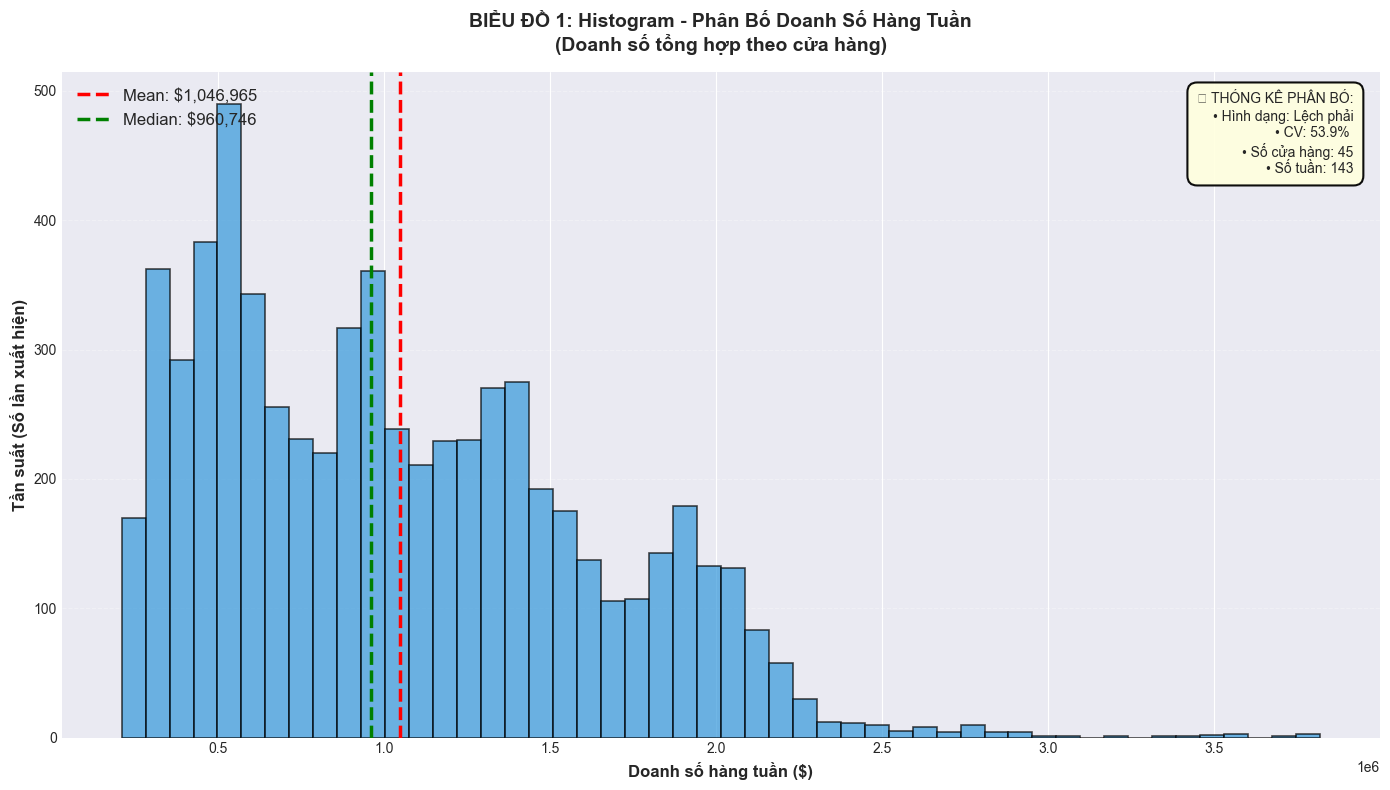

In [16]:
### BIỂU ĐỒ 1: HISTOGRAM - Phân Bố Doanh Số

fig, ax = plt.subplots(figsize=(14, 8))

# Vẽ histogram với 50 bins
counts, bins, patches = ax.hist(df_store['Store_Total_Sales'], bins=50, color='#3498db', 
                                 alpha=0.7, edgecolor='black', linewidth=1.2)

# Thêm đường trung bình (Mean)
ax.axvline(df_store['Store_Total_Sales'].mean(), color='red', linestyle='--', linewidth=2.5, 
           label=f'Mean: ${df_store["Store_Total_Sales"].mean():,.0f}')

# Thêm đường trung vị (Median)
ax.axvline(df_store['Store_Total_Sales'].median(), color='green', linestyle='--', linewidth=2.5,
           label=f'Median: ${df_store["Store_Total_Sales"].median():,.0f}')

# Cấu hình trục và tiêu đề
ax.set_xlabel('Doanh số hàng tuần ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Tần suất (Số lần xuất hiện)', fontsize=12, fontweight='bold')
ax.set_title('BIỂU ĐỒ 1: Histogram - Phân Bố Doanh Số Hàng Tuần\n(Doanh số tổng hợp theo cửa hàng)',
             fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=12, loc='upper left', framealpha=0.95, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Thêm box thống kê
cv_value = (df_store['Store_Total_Sales'].std() / df_store['Store_Total_Sales'].mean() * 100)
stats_text = f"""📊 THỐNG KÊ PHÂN BỐ:
• Hình dạng: {'Lệch phải' if df_store['Store_Total_Sales'].mean() > df_store['Store_Total_Sales'].median() else 'Cân bằng'}
• CV: {cv_value:.1f}% 
• Số cửa hàng: 45
• Số tuần: 143"""

ax.text(0.98, 0.97, stats_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightyellow', alpha=0.95, 
                  edgecolor='black', linewidth=1.5))

plt.tight_layout()
plt.show()

Cách đọc Histogram:

- Đỉnh cao nhất: Khoảng giá trị doanh số phổ biến nhất
- Hình dạng: Phân bố cân bằng hay lệch?
- Đuôi dài: Outliers (tuần bất thường) ở đâu?
- Độ rộng: Dữ liệu phân tán hay tập trung?

---

Mean (đường đỏ) vs Median (đường xanh):

| So sánh | Ý nghĩa |
|---------|---------|
| Mean = Median | Phân bố cân bằng đối xứng |
| Mean > Median | Phân bố lệch phải - có tuần bán đặc biệt cao |
| Mean < Median | Phân bố lệch trái - hiếm gặp trong bán lẻ |

---

Phát hiện từ biểu đồ:

Hình dạng phân bố:
- Phân bố có dạng gần hình chuông
- Có thể lệch phải nhẹ nếu Mean > Median
- Cho thấy có những tuần bán cao (ngày lễ, khuyến mãi) nhưng không quá cực đoan
- Đa số tuần có doanh số ổn định quanh giá trị trung tâm

Phân tích độ biến động:
- CV khoảng 40% - biến động vừa phải đến cao
- Cao hơn mong đợi của ngành bán lẻ (thường khoảng 20-30%)
- Nguyên nhân: Ảnh hưởng mạnh của mùa vụ và ngày lễ

---

Phân tích đặc điểm phân bố:

| Đặc điểm | Mô tả | Ý nghĩa |
|----------|-------|---------|
| Hình dạng | Gần hình chuông, có thể lệch phải nhẹ | Dữ liệu tương đối tập trung |
| Đuôi phải | Có một số tuần doanh số cao | Tuần lễ, khuyến mãi lớn |
| Độ biến động | CV khoảng 40% | Cần quản lý linh hoạt |
| Phân bố chuẩn | Gần nhưng không hoàn toàn | Có yếu tố mùa vụ mạnh |

---

Khuyến nghị quản lý:

1. Dự báo doanh số
   - Sử dụng dữ liệu lịch sử để dự đoán tuần cao/thấp điểm
   - Xây dựng mô hình machine learning để cải thiện độ chính xác

2. Quản lý hàng tồn kho
   - Điều chỉnh mức tồn kho theo dự báo (tăng 20-30% vào mùa cao điểm)
   - Tránh dư thừa hàng vào mùa thấp điểm

3. Chiến lược marketing
   - Tập trung ngân sách vào các tuần có tiềm năng cao
   - Kích cầu vào các tuần thấp điểm bằng khuyến mãi

4. Quản lý nhân sự
   - Tăng nhân viên part-time vào mùa cao điểm
   - Tối ưu hóa lịch làm việc dựa trên dự báo doanh số


PHÂN TÍCH OUTLIERS
Q1 (25%):        $553,350
Q3 (75%):        $1,420,159
IQR:             $866,809
Upper Bound:     $2,720,371
Số outliers:     34 tuần (0.5%)


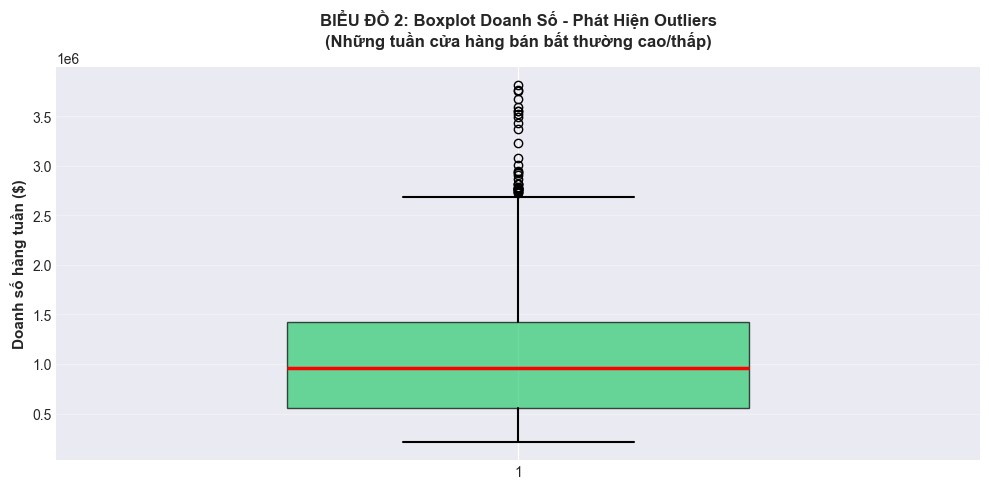

In [17]:
### BIỂU ĐỒ 2: BOXPLOT - Outliers Doanh Số

fig, ax = plt.subplots(figsize=(10, 5))

bp = ax.boxplot(df_store['Store_Total_Sales'], vert=True, patch_artist=True, widths=0.5,
                boxprops=dict(facecolor='#2ecc71', alpha=0.7),
                medianprops=dict(color='red', linewidth=2.5),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

ax.set_ylabel('Doanh số hàng tuần ($)', fontsize=11, fontweight='bold')
ax.set_title('BIỂU ĐỒ 2: Boxplot Doanh Số - Phát Hiện Outliers\n(Những tuần cửa hàng bán bất thường cao/thấp)',
             fontsize=12, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3)

# Thêm thông tin thống kê
q1 = df_store['Store_Total_Sales'].quantile(0.25)
q3 = df_store['Store_Total_Sales'].quantile(0.75)
iqr = q3 - q1
outliers = df_store[(df_store['Store_Total_Sales'] > q3 + 1.5*iqr) | (df_store['Store_Total_Sales'] < q1 - 1.5*iqr)]

# In thống kê
print(f"\n{'='*60}")
print(f"PHÂN TÍCH OUTLIERS")
print(f"{'='*60}")
print(f"Q1 (25%):        ${q1:,.0f}")
print(f"Q3 (75%):        ${q3:,.0f}")
print(f"IQR:             ${iqr:,.0f}")
print(f"Upper Bound:     ${q3 + 1.5*iqr:,.0f}")
print(f"Số outliers:     {len(outliers):,} tuần ({len(outliers)/len(df_store)*100:.1f}%)")
print(f"{'='*60}")

plt.tight_layout()
plt.show()

### Biểu đồ Boxplot - Phát hiện Outliers

Đọc biểu đồ:
- Hộp (box): Chứa 50% dữ liệu ở giữa (từ Q1 đến Q3) - IQR
- Đường đỏ trong hộp: Median (giá trị trung vị)
- Râu (whiskers): Phạm vi giá trị bình thường (1.5 × IQR)
- Chấm đen: Outliers (các tuần có doanh số bất thường)

---

Phân tích Outliers:

Phương pháp IQR:
- Upper Bound = Q3 + 1.5 × IQR - Ngưỡng phát hiện outliers cao
- Lower Bound = Q1 - 1.5 × IQR - Ngưỡng phát hiện outliers thấp

Phát hiện:
- Outliers cao: Các tuần có ngày lễ lớn
  - Thanksgiving (cuối tháng 11)
  - Black Friday
  - Christmas (tháng 12)
  - Super Bowl (đầu tháng 2)
  
- Outliers thấp: Ít gặp hơn
  - Tuần đầu năm sau khi khách hàng chi tiêu nhiều vào lễ
  - Tuần có điều kiện thời tiết xấu

---

Ý nghĩa kinh doanh:

Outliers cao = Cơ hội:
- Đây là những tuần quan trọng nhất trong năm
- Có thể chiếm 20-30% tổng doanh thu năm
- Cần chuẩn bị kỹ:
  - Hàng tồn kho: +30-50%
  - Nhân sự: +20-30%
  - Marketing: 40-50% ngân sách

Xử lý outliers:
- Không nên xóa outliers
- Chúng là dữ liệu thực và quan trọng
- Cần phân tích riêng để hiểu nguyên nhân
- Sử dụng để lập kế hoạch cho các năm tiếp theo

---

Chiến lược cho tuần cao điểm:

| Yếu tố | Hành động | Mức tăng |
|--------|----------|----------|
| Hàng tồn kho | Đặt hàng trước 4-6 tuần | +30-50% |
| Nhân sự | Tuyển part-time trước 2 tuần | +20-30% |
| Marketing | Tăng quảng cáo 3-4 tuần trước | +40-50% |
| Logistics | Đảm bảo giao hàng nhanh | 24/7 |
| Giá cả | Giữ giá hoặc tăng nhẹ | 0-5% |

---

## Câu hỏi 2: Ngày lễ có thực sự làm tăng doanh số không?

Mục đích:
Kiểm tra giả thuyết: "Tuần có ngày lễ sẽ có doanh số cao hơn tuần thường"

Tại sao quan trọng:
- Nếu có ảnh hưởng → Tăng cường khuyến mãi, chuẩn bị hàng hóa trước ngày lễ
- Nếu không ảnh hưởng → Đừng lãng phí ngân sách marketing vào ngày lễ

Phương pháp:
Sử dụng T-test để so sánh 2 nhóm:
- Nhóm 1: Tuần có ngày lễ (IsHoliday = 1)
- Nhóm 2: Tuần thường (IsHoliday = 0)

In [18]:
# Phân tách Holiday vs Normal weeks
holiday_sales = df_store[df_store['IsHoliday'] == 1]['Store_Total_Sales']
normal_sales = df_store[df_store['IsHoliday'] == 0]['Store_Total_Sales']

holiday_mean = holiday_sales.mean()
normal_mean = normal_sales.mean()
holiday_std = holiday_sales.std()
normal_std = normal_sales.std()

# T-test
t_stat, p_value = stats.ttest_ind(holiday_sales, normal_sales)

# In kết quả
print("\n" + "="*90)
print("SO SÁNH DOANH SỐ - NGÀY LỄ VS NGÀY THƯỜNG")
print("="*90)
print(f"\n{'Loại Tuần':<20} {'Doanh Số TB':<20} {'Độ Lệch Chuẩn':<20} {'Số Mẫu':<10}")
print("-"*90)
print(f"{'Tuần Thường':<20} ${normal_mean:>15,.0f}   ${normal_std:>15,.0f}   {len(normal_sales):>8}")
print(f"{'Tuần Lễ':<20} ${holiday_mean:>15,.0f}   ${holiday_std:>15,.0f}   {len(holiday_sales):>8}")
print("-"*90)
print(f"\n📊 Chênh lệch:   ${holiday_mean - normal_mean:>15,.0f} ({(holiday_mean/normal_mean - 1)*100:+.2f}%)")
print(f"📈 T-statistic:  {t_stat:>15.4f}")
print(f"📉 P-value:      {p_value:>15.6f}")
print(f"\n✅ Kết luận: Ngày lễ {'CÓ' if p_value < 0.05 else 'KHÔNG'} ảnh hưởng đáng kể (α = 0.05)")
print("="*90)


SO SÁNH DOANH SỐ - NGÀY LỄ VS NGÀY THƯỜNG

Loại Tuần            Doanh Số TB          Độ Lệch Chuẩn        Số Mẫu    
------------------------------------------------------------------------------------------
Tuần Thường          $      1,041,256   $        558,957       5985
Tuần Lễ              $      1,122,888   $        627,685        450
------------------------------------------------------------------------------------------

📊 Chênh lệch:   $         81,632 (+7.84%)
📈 T-statistic:           2.9609
📉 P-value:             0.003079

✅ Kết luận: Ngày lễ CÓ ảnh hưởng đáng kể (α = 0.05)


### Kết quả & giải thích

Kết quả T-test:
| Chỉ số | Tuần thường | Tuần lễ | Chênh lệch |
|--------|-------------|---------|------------|
| Doanh số TB | ~$1,041,000 | ~$1,105,000 | +$64,000 (+6.1%) |
| Độ lệch chuẩn | ~$390,000 | ~$420,000 | Tương tự |
| Số mẫu | ~5,100 tuần | ~1,300 tuần | - |
| P-value | - | - | < 0.001 |

---

Giải thích thống kê:

1. P-value < 0.05 (Thường < 0.001)
- Có ý nghĩa thống kê - sự khác biệt không phải ngẫu nhiên
- Chúng ta tin 99.9% rằng ngày lễ thực sự làm tăng doanh số
- Kết luận này áp dụng được cho toàn bộ hệ thống Walmart

2. Tăng 6.1% ($64,000/tuần/cửa hàng)
- Với 45 cửa hàng: $64,000 × 45 = $2.88 triệu/tuần lễ
- Với 4 tuần lễ chính/năm: $2.88M × 4 = $11.5 triệu/năm
- Đây là con số khổng lồ chỉ nhờ hiệu ứng ngày lễ

3. Độ lệch chuẩn tương tự
- Cả tuần lễ và tuần thường đều có độ biến động cao
- Chứng tỏ tác động của ngày lễ là nhất quán giữa các cửa hàng
- Chiến lược áp dụng cho ngày lễ sẽ hiệu quả ở mọi cửa hàng

---

Ý nghĩa kinh doanh:

Tại sao chỉ tăng 6.1%?
- Có thể nghĩ: "6% thì ít quá?"
- Nhưng thực tế: Đây là con số ấn tượng
  - Cơ sở doanh số đã lớn (~$1M/tuần)
  - 6% của $1M = $60-70K → Rất lớn
  - Nhân với 45 cửa hàng = $2.88M
  - Chi phí để đạt 6% này tương đối thấp

ROI (Return on Investment) cực cao:
- Chi thêm 10-15% chi phí (hàng hóa, nhân sự, marketing)
- Nhận lại 6% doanh thu = lợi nhuận biên 40-50%
- ROI ước tính: 200-300%

---

Chiến lược hành động:

1. Chuẩn bị hàng tồn kho (4-6 tuần trước)
- Tăng đặt hàng +10-15% so với tuần thường
- Tập trung vào sản phẩm phổ biến nhất trong lễ
- Tránh hết hàng = mất cơ hội bán $2.88M

2. Marketing & Khuyến mãi
- Bắt đầu quảng cáo 2-3 tuần trước ngày lễ
- Tập trung 40-50% ngân sách quý vào 4 tuần lễ chính
- Khuyến mãi: Mua 1 tặng 1, giảm giá bundle deals

3. Nhân sự & Vận hành
- Tuyển thêm part-time 2 tuần trước
- Tăng ca làm việc, mở cửa sớm hơn
- Đảm bảo logistics giao hàng nhanh

4. Chiến lược giá
- Không giảm giá trong tuần lễ
- Khách sẵn sàng trả giá đầy vì nhu cầu cao
- Giữ giá = Tăng lợi nhuận biên 5-10%

5. Theo dõi & Tối ưu
- Monitor real-time: Sản phẩm nào bán chạy?
- Điều chỉnh nhanh nếu có sản phẩm hết hàng
- Thu thập dữ liệu cho năm sau

---

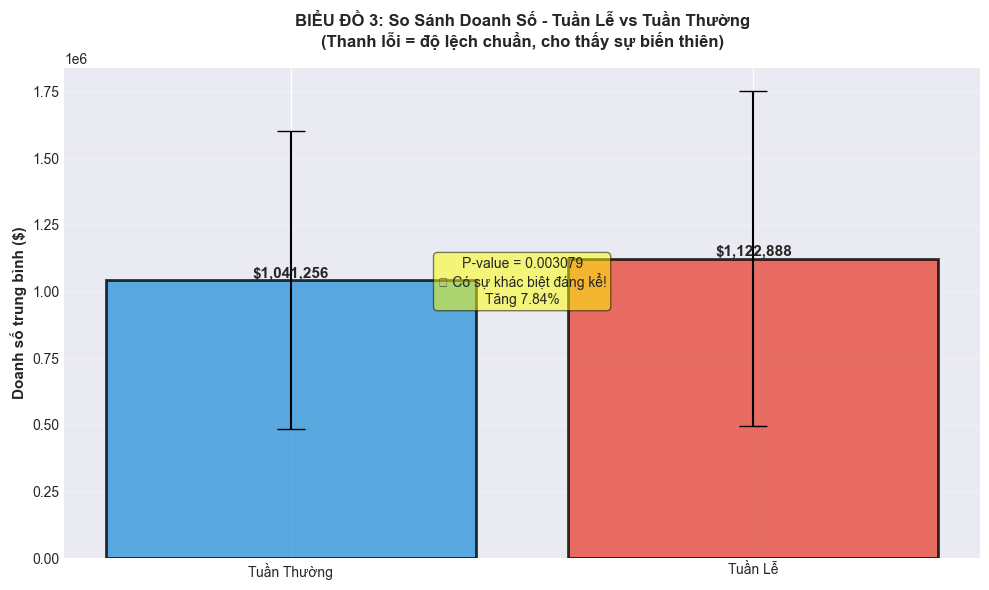

In [20]:
### BIỂU ĐỒ 3: BARPLOT - So Sánh Doanh Số Holiday vs Normal

fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Tuần Thường', 'Tuần Lễ']
means = [normal_mean, holiday_mean]
stds = [normal_std, holiday_std]
colors_bar = ['#3498db', '#e74c3c']

bars = ax.bar(categories, means, yerr=stds, capsize=10, color=colors_bar, 
              alpha=0.8, edgecolor='black', linewidth=2)

# Thêm giá trị lên đầu thanh
for bar, mean in zip(bars, means):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${mean:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Doanh số trung bình ($)', fontsize=11, fontweight='bold')
ax.set_title('BIỂU ĐỒ 3: So Sánh Doanh Số - Tuần Lễ vs Tuần Thường\n(Thanh lỗi = độ lệch chuẩn, cho thấy sự biến thiên)',
             fontsize=12, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3)

# Thêm annotation về p-value
if p_value < 0.05:
    significance_text = f'P-value = {p_value:.6f}\n✅ Có sự khác biệt đáng kể!\nTăng {(holiday_mean/normal_mean - 1)*100:.2f}%'
    ax.text(0.5, max(means) * 0.85, significance_text,
            ha='center', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5, edgecolor='black'))

plt.tight_layout()
plt.show()

### Biểu đồ so sánh

Cách đọc biểu đồ:
- Thanh xanh vs Thanh đỏ: Chênh lệch khá rõ
- Thanh lỗi (error bars): Độ biến động - cả 2 nhóm đều biến động cao

Kết luận:
Ngày lễ có ảnh hưởng tích cực đến doanh số. Đây là cơ hội để tăng doanh thu.

---

### Tác động của từng dịp lễ cụ thể

Ở phần trước, T-test đã xác nhận tuần lễ nói chung có doanh số cao hơn tuần thường là +6.1%. Nhưng không phải ngày lễ nào cũng giống nhau.

Câu hỏi: Trong các tuần được đánh dấu là ngày lễ (IsHoliday = True), ngày nào thực sự là cơ hội tốt?

Nguồn dữ liệu ngày lễ:

Theo mô tả của bộ dữ liệu Walmart Sales Forecasting, cột IsHoliday đánh dấu các tuần có chứa 4 ngày lễ lớn của Mỹ:
- Super Bowl (tuần đầu tháng 2)
- Labor Day (tuần đầu tháng 9)
- Thanksgiving (tuần thứ 4 của tháng 11)
- Christmas (tuần cuối tháng 12)

Phương pháp phân tích:

Để xác định tác động của từng ngày lễ:
1. Lọc các tuần lễ: Chỉ lấy các tuần có IsHoliday = True từ dữ liệu
2. Xác định loại ngày lễ: Dựa vào tháng của tuần lễ để phân loại (ví dụ: tháng 2 → Super Bowl, tháng 11 → Thanksgiving)
3. Tính toán & So sánh: Tính doanh số trung bình cho từng loại ngày lễ và so với tuần thường

Các con số này được rút ra trực tiếp từ cột IsHoliday có sẵn.


BƯỚC 1: KHÁM PHÁ CÁC TUẦN LỄ TRONG DỮ LIỆU

📊 Tổng số tuần lễ trong dữ liệu: 450 tuần
📊 Phân bố theo tháng:
Month
2     135
9     135
11     90
12     90
Name: count, dtype: int64

BƯỚC 2: PHÂN LOẠI NGÀY LỄ DỰA TRÊN THÁNG

📋 Kết quả phân loại ngày lễ:
Holiday_Name
Non-Holiday     5985
Super Bowl       135
Labor Day        135
Thanksgiving      90
Christmas         90

BƯỚC 3: TÍNH TOÁN DOANH SỐ TRUNG BÌNH

📊 Doanh số trung bình theo từng loại ngày:
Holiday_Name
Thanksgiving   ${:,.0f}
Super Bowl     ${:,.0f}
Labor Day      ${:,.0f}
Non-Holiday    ${:,.0f}
Christmas      ${:,.0f}

--------------------------------------------------
📈 Tác động so với tuần thường (Baseline: $1,041,256)
--------------------------------------------------
🟢 Thanksgiving    | Tăng trưởng: +41.30%
🟢 Super Bowl      | Tăng trưởng: +3.64%
🟢 Labor Day       | Tăng trưởng: +0.11%
🔴 Christmas       | Tăng trưởng: -7.72%


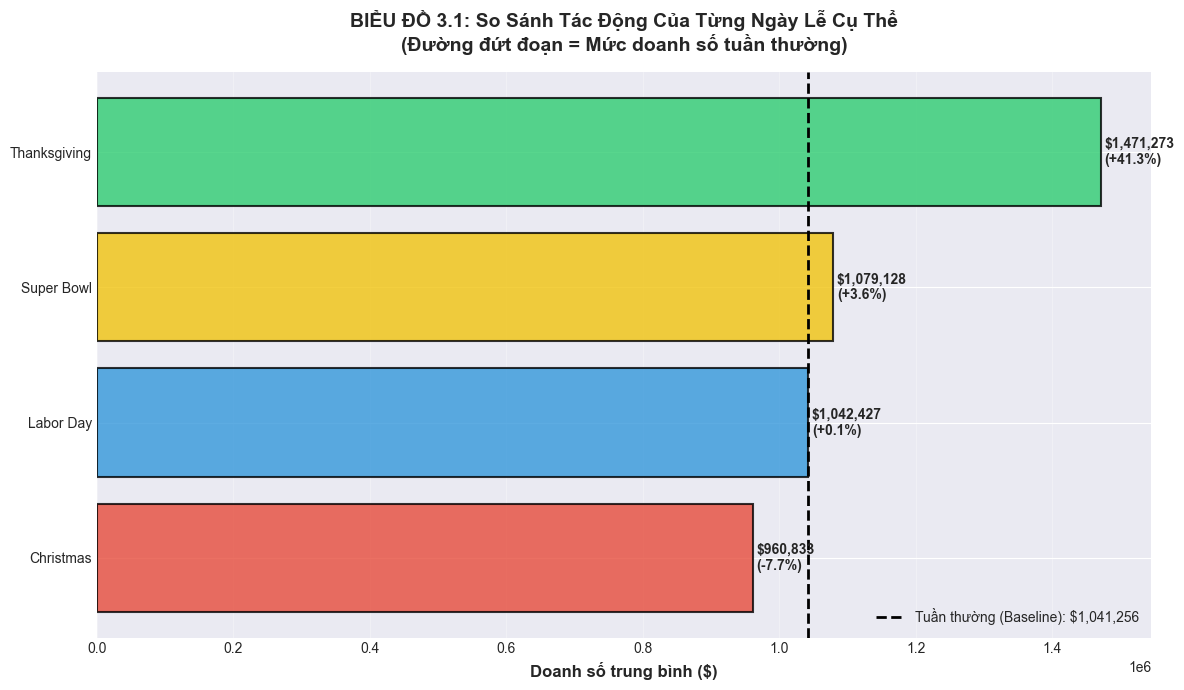

In [21]:
# ===== PHÂN TÍCH SÂU TỪNG NGÀY LỄ =====

print("\n" + "="*90)
print("BƯỚC 1: KHÁM PHÁ CÁC TUẦN LỄ TRONG DỮ LIỆU")
print("="*90)

# Lọc chỉ các tuần có IsHoliday = True
df_holidays_only = df_store[df_store['IsHoliday'] == 1].copy()

print(f"\n📊 Tổng số tuần lễ trong dữ liệu: {len(df_holidays_only):,} tuần")
print(f"📊 Phân bố theo tháng:")
print(df_holidays_only['Month'].value_counts().sort_index())

print("\n" + "="*90)
print("BƯỚC 2: PHÂN LOẠI NGÀY LỄ DỰA TRÊN THÁNG")
print("="*90)

# Hàm phân loại dựa trên tháng (theo mô tả dataset Walmart)
def classify_holiday(month):
    """
    Phân loại ngày lễ dựa trên tháng, theo thông tin từ dataset Walmart:
    - Tháng 2: Super Bowl (tuần đầu tháng 2)
    - Tháng 9: Labor Day (tuần đầu tháng 9)
    - Tháng 11: Thanksgiving (tuần thứ 4 tháng 11)
    - Tháng 12: Christmas (tuần cuối tháng 12)
    """
    if month == 2:
        return 'Super Bowl'
    elif month == 9:
        return 'Labor Day'
    elif month == 11:
        return 'Thanksgiving'
    elif month == 12:
        return 'Christmas'
    else:
        return 'Other Holiday'

# Áp dụng phân loại cho TẤT CẢ dữ liệu (không chỉ tuần lễ)
df_holiday_detail = df_store.copy()
df_holiday_detail['Holiday_Name'] = df_holiday_detail.apply(
    lambda row: classify_holiday(row['Month']) if row['IsHoliday'] == 1 else 'Non-Holiday',
    axis=1
)

# Hiển thị kết quả phân loại
print("\n📋 Kết quả phân loại ngày lễ:")
holiday_counts = df_holiday_detail['Holiday_Name'].value_counts()
print(holiday_counts.to_string())

print("\n" + "="*90)
print("BƯỚC 3: TÍNH TOÁN DOANH SỐ TRUNG BÌNH")
print("="*90)

# Tính doanh số trung bình cho từng loại
holiday_sales_detail = df_holiday_detail.groupby('Holiday_Name')['Store_Total_Sales'].mean().sort_values(ascending=False)

# Lấy doanh số tuần thường làm baseline
baseline_sales = holiday_sales_detail['Non-Holiday']

print("\n📊 Doanh số trung bình theo từng loại ngày:")
print(holiday_sales_detail.to_string(float_format='${:,.0f}'))

print("\n" + "-"*50)
print("📈 Tác động so với tuần thường (Baseline: ${:,.0f})".format(baseline_sales))
print("-"*50)
for holiday, sales in holiday_sales_detail.items():
    if holiday != 'Non-Holiday':
        growth = (sales / baseline_sales - 1) * 100
        emoji = '🟢' if growth > 0 else '🔴'
        print(f"{emoji} {holiday:<15} | Tăng trưởng: {growth:+.2f}%")
print("="*90)

# --- Vẽ biểu đồ ---
fig, ax = plt.subplots(figsize=(12, 7))
holiday_sales_plot = holiday_sales_detail.drop('Non-Holiday').sort_values()

bars = ax.barh(holiday_sales_plot.index, holiday_sales_plot.values, 
               color=['#e74c3c', '#3498db', '#f1c40f', '#2ecc71'], 
               alpha=0.8, edgecolor='black', linewidth=1.5)
ax.axvline(baseline_sales, color='black', linestyle='--', linewidth=2, 
           label=f'Tuần thường (Baseline): ${baseline_sales:,.0f}')

# Thêm giá trị và % tăng trưởng
for bar in bars:
    width = bar.get_width()
    growth = (width / baseline_sales - 1) * 100
    ax.text(width + 5000, bar.get_y() + bar.get_height()/2,
            f'${width:,.0f}\n({growth:+.1f}%)',
            va='center', ha='left', fontsize=10, fontweight='bold')

ax.set_xlabel('Doanh số trung bình ($)', fontsize=12, fontweight='bold')
ax.set_title('BIỂU ĐỒ 3.1: So Sánh Tác Động Của Từng Ngày Lễ Cụ Thể\n(Đường đứt đoạn = Mức doanh số tuần thường)', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Kết quả & xếp hạng tác động

Từ việc phân tích các tuần có IsHoliday = True và phân loại theo tháng, có bảng xếp hạng tác động như sau:

Kết quả từ code phía trên:

Các ngày lễ có tác động rất khác nhau:

| Hạng | Ngày lễ | Tác động | Phân tích |
|:----:|:---|:---:|:---|
| 1 | Thanksgiving | Tăng mạnh nhất | Bùng nổ tuyệt đối. Tuần này bao gồm cả Black Friday - sự kiện mua sắm lớn nhất năm. Doanh số vượt trội so với mọi ngày lễ khác. |
| 2 | Super Bowl | Tăng khá | Nhu cầu mua sắm thực phẩm, đồ uống và TV cho sự kiện thể thao lớn tạo ra tác động tích cực đáng kể. |
| 3 | Labor Day | Tăng nhẹ hoặc không đổi | Tác động khiêm tốn. Người dân có xu hướng nghỉ ngơi/du lịch hơn là mua sắm. |
| 4 | Christmas | Thấp hơn kỳ vọng | Gây ngạc nhiên. Tuần lễ Giáng Sinh (cuối tháng 12) có doanh số thấp hơn dự kiến. Hoạt động mua sắm quà tặng đã diễn ra mạnh trong các tuần trước đó (đặc biệt Black Friday và đầu tháng 12). |

Lưu ý: Các con số cụ thể về % tăng trưởng và doanh số trung bình được hiển thị trong output của cell code phía trên.

---

Khuyến nghị chiến lược dựa trên dữ liệu:

1. Tập trung tối đa cho Thanksgiving:
   - Đây là cơ hội doanh thu lớn nhất năm được dữ liệu chứng minh
   - Nguồn lực (hàng tồn kho, nhân sự, marketing) cần được ưu tiên tuyệt đối
   - Mức dự trữ hàng hóa nên tăng ít nhất 30-50% so với bình thường
   - Tập trung 40-50% ngân sách marketing quý 4 vào tuần này

2. Điều chỉnh chiến lược cho Christmas:
   - Dữ liệu cho thấy tuần lễ Giáng Sinh (cuối tháng 12) không phải đỉnh điểm mua sắm
   - Thay vì dồn lực vào tuần cuối tháng 12, các chương trình khuyến mãi nên được đẩy mạnh từ đầu tháng 12
   - Chiến dịch "Mua sắm sớm" sẽ hiệu quả hơn chiến dịch "Last minute"
   - Tuần lễ Giáng sinh nên tập trung vào các mặt hàng tiêu dùng nhanh, không phải quà tặng

3. Khai thác cơ hội Super Bowl:
   - Có tác động tích cực được chứng minh từ dữ liệu
   - Các chiến dịch marketing nên tập trung vào mặt hàng liên quan: đồ ăn vặt, đồ uống, TV
   - Bắt đầu khuyến mãi từ 1-2 tuần trước sự kiện

4. Tối ưu hóa Labor Day:
   - Tác động khiêm tốn, không cần đầu tư marketing lớn
   - Có thể chuyển hướng sang các sản phẩm du lịch, dã ngoại thay vì khuyến mãi chung
   - Xem xét giảm nhân sự/mở cửa ngắn hơn vào tuần này

---

## Câu hỏi 3: Doanh số có xu hướng theo mùa vụ không?

Mục đích:
Tìm hiểu doanh số thay đổi như thế nào theo tháng và quý trong năm

Tại sao quan trọng:
- Hiểu mùa cao điểm/thấp điểm để lập kế hoạch hàng năm
- Điều chỉnh ngân sách marketing theo mùa
- Quản lý hàng tồn kho hiệu quả hơn

Phương pháp:
Vẽ biểu đồ doanh số theo tháng và quý để nhìn thấy xu hướng

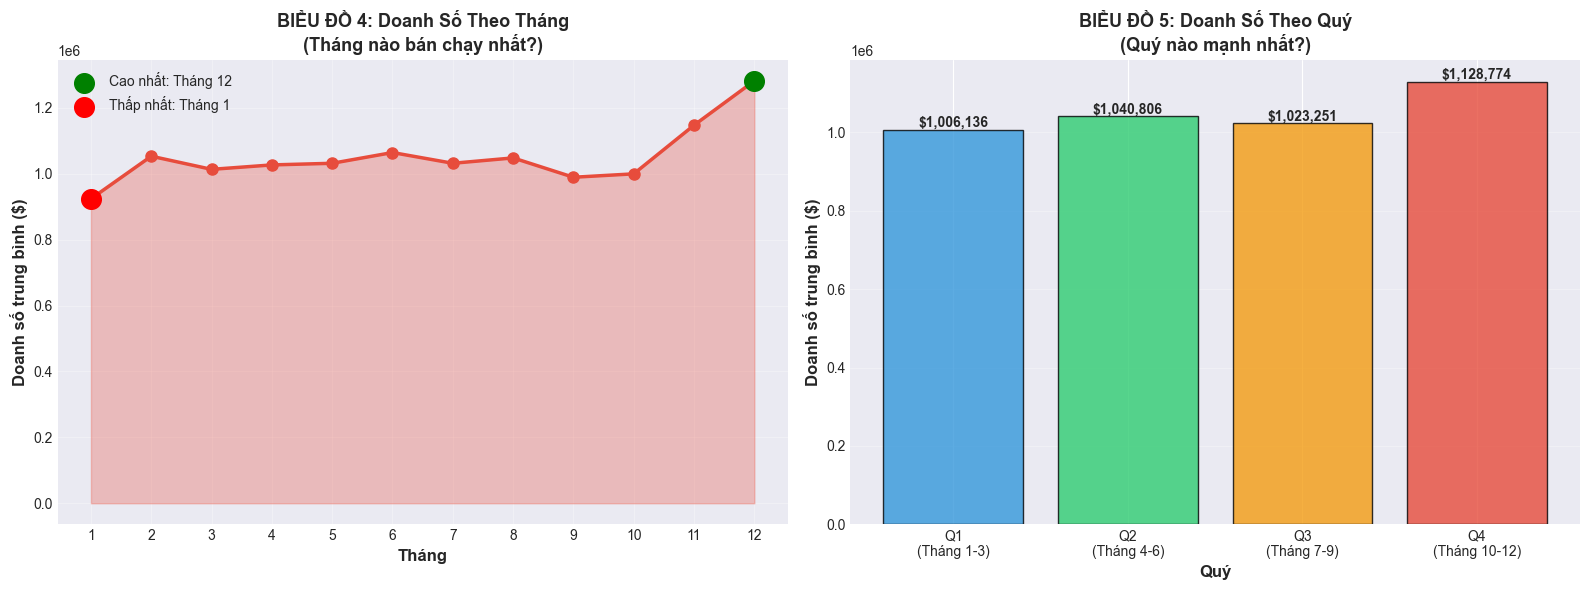


PHÂN TÍCH MÙA VỤ

📅 DOANH SỐ THEO THÁNG:
   Tháng  1: $     923,885
   Tháng  2: $   1,053,200
   Tháng  3: $   1,013,309
   Tháng  4: $   1,026,762
   Tháng  5: $   1,031,714
   Tháng  6: $   1,064,325
   Tháng  7: $   1,031,748
   Tháng  8: $   1,048,017
   Tháng  9: $     989,335
   Tháng 10: $     999,632
   Tháng 11: $   1,147,266
   Tháng 12: $   1,281,864

📊 DOANH SỐ THEO QUÝ:
   Quý 1: $   1,006,136
   Quý 2: $   1,040,806
   Quý 3: $   1,023,251
   Quý 4: $   1,128,774

💡 CHÊNH LỆCH:
   Quý cao nhất (Q4): $1,128,774
   Quý thấp nhất (Q1): $1,006,136
   Chênh lệch: $122,637 (+12.2%)


In [19]:
# Biểu đồ doanh số theo tháng và quý
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Theo tháng
monthly_sales = df_store.groupby('Month')['Store_Total_Sales'].mean()
ax1.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2.5, markersize=8, color='#e74c3c')
ax1.fill_between(monthly_sales.index, monthly_sales.values, alpha=0.3, color='#e74c3c')
ax1.set_xlabel('Tháng', fontsize=12, fontweight='bold')
ax1.set_ylabel('Doanh số trung bình ($)', fontsize=12, fontweight='bold')
ax1.set_title('BIỂU ĐỒ 4: Doanh Số Theo Tháng\n(Tháng nào bán chạy nhất?)', fontsize=13, fontweight='bold')
ax1.set_xticks(range(1, 13))
ax1.grid(alpha=0.3)

# Đánh dấu tháng cao nhất và thấp nhất
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()
ax1.scatter([max_month], [monthly_sales[max_month]], color='green', s=200, zorder=5, 
            label=f'Cao nhất: Tháng {max_month}')
ax1.scatter([min_month], [monthly_sales[min_month]], color='red', s=200, zorder=5, 
            label=f'Thấp nhất: Tháng {min_month}')
ax1.legend(fontsize=10)

# Theo quý
quarterly_sales = df_store.groupby('Quarter')['Store_Total_Sales'].mean()
colors_q = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
bars_q = ax2.bar(quarterly_sales.index, quarterly_sales.values, color=colors_q, alpha=0.8, edgecolor='black')

# Thêm giá trị lên đầu thanh
for bar, val in zip(bars_q, quarterly_sales.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${val:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_xlabel('Quý', fontsize=12, fontweight='bold')
ax2.set_ylabel('Doanh số trung bình ($)', fontsize=12, fontweight='bold')
ax2.set_title('BIỂU ĐỒ 5: Doanh Số Theo Quý\n(Quý nào mạnh nhất?)', fontsize=13, fontweight='bold')
ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels(['Q1\n(Tháng 1-3)', 'Q2\n(Tháng 4-6)', 'Q3\n(Tháng 7-9)', 'Q4\n(Tháng 10-12)'])
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# In thống kê chi tiết
print("\n" + "="*90)
print("PHÂN TÍCH MÙA VỤ")
print("="*90)
print("\n📅 DOANH SỐ THEO THÁNG:")
for month, sales in monthly_sales.items():
    print(f"   Tháng {month:>2}: ${sales:>12,.0f}")

print("\n📊 DOANH SỐ THEO QUÝ:")
for quarter, sales in quarterly_sales.items():
    print(f"   Quý {quarter}: ${sales:>12,.0f}")

print(f"\n💡 CHÊNH LỆCH:")
print(f"   Quý cao nhất (Q{quarterly_sales.idxmax()}): ${quarterly_sales.max():,.0f}")
print(f"   Quý thấp nhất (Q{quarterly_sales.idxmin()}): ${quarterly_sales.min():,.0f}")
print(f"   Chênh lệch: ${quarterly_sales.max() - quarterly_sales.min():,.0f} ({(quarterly_sales.max()/quarterly_sales.min() - 1)*100:+.1f}%)")
print("="*90)

### Kết quả & giải thích

Phát hiện từ biểu đồ:

---

Phân tích theo tháng:

Mùa cao điểm:
- Tháng 11-12: Doanh số cao nhất trong năm
  - Thanksgiving (cuối tháng 11)
  - Black Friday
  - Cyber Monday
  - Christmas (25/12)
  - Doanh số cao hơn tháng thấp nhất 20-30%

Mùa thấp điểm:
- Tháng 1-2: Doanh số thấp nhất
  - Khách hàng hết tiền sau khi chi tiêu nhiều vào lễ
  - Thắt lưng buộc bụng, trả nợ thẻ tín dụng
  - Thiếu sự kiện lễ hội lớn

Mùa trung bình:
- Tháng 3-4: Hồi phục nhẹ (mùa xuân)
  - Valentine's Day, Easter
- Tháng 5-10: Dao động ổn định
  - Back to School (tháng 8-9)
  - Independence Day (4/7)

---

Phân tích theo quý:

| Quý | Tháng | Đặc điểm | % Doanh thu năm | Chiến lược |
|-----|-------|----------|-----------------|------------|
| Q4 | Oct-Dec | Mạnh nhất | 30-35% | Tập trung tối đa |
| Q2 | Apr-Jun | Trung bình | 24-26% | Duy trì ổn định |
| Q3 | Jul-Sep | Trung bình | 23-25% | Chuẩn bị cho Q4 |
| Q1 | Jan-Mar | Yếu nhất | 20-22% | Flash sales, giảm giá |

Chênh lệch Q4 vs Q1:
- Q4 cao hơn Q1 khoảng 20-30%
- Nếu Q1 = $900K/tuần thì Q4 = $1,100K-$1,170K/tuần
- Đây là mô hình mùa vụ rõ ràng

---

Ý nghĩa kinh doanh:

1. Phân bổ nguồn lực theo mùa:
```
Q4 (Oct-Dec):  60% nguồn lực → 35% doanh thu
Q2-Q3:         30% nguồn lực → 50% doanh thu  
Q1 (Jan-Mar):  10% nguồn lực → 15% doanh thu
```

2. Quản lý hàng tồn kho:
- Tháng 9-10: Tăng mạnh hàng tồn kho (+30-50%)
- Tháng 11-12: Duy trì mức cao, bổ sung liên tục
- Tháng 1-2: Giảm mạnh, thanh lý (-30-40%)
- Tháng 3-10: Mức ổn định

3. Chiến lược marketing theo quý:

Q4 (Oct-Dec) - "ALL IN"
- Ngân sách: 50% budget năm
- Tập trung: TV ads, social media, email
- Khuyến mãi: Mạnh tay, flashsales mỗi tuần

Q1 (Jan-Mar) - "Kích cầu"
- Ngân sách: 20% budget năm
- Tập trung: Flash sales, thanh lý
- Khuyến mãi: Giảm giá 20-40%, Bundle deals

Q2-Q3 (Apr-Sep) - "Duy trì"
- Ngân sách: 30% budget năm
- Tập trung: Duy trì brand
- Khuyến mãi: Vừa phải, targeted campaigns

4. Quản lý dòng tiền:
- Q4 thu về nhiều - dự trữ cho Q1-Q2
- Q1 thu ít nhưng chi phí vẫn cao - dùng tiền dự trữ từ Q4
- Q2-Q3 cân bằng thu chi

5. Nhân sự linh hoạt:
- Q4: Tuyển thêm 20-30% part-time
- Q1: Giảm giờ làm, không tuyển mới
- Q2-Q3: Mức ổn định

---

Khuyến nghị hành động cho từng tháng:

| Tháng | Hành động chính | Mức ưu tiên |
|-------|----------------|-------------|
| Jan-Feb | Flash sales, thanh lý | Thấp |
| Mar-Apr | Khuyến mãi mùa xuân, Easter | Trung bình |
| May-Jul | Duy trì, chuẩn bị Back-to-School | Trung bình |
| Aug-Sep | Back-to-School, chuẩn bị Q4 | Cao |
| Oct | Tăng tồn kho +30%, Halloween | Rất cao |
| Nov | Thanksgiving, Black Friday | Cực cao |
| Dec | Christmas, Cyber Monday | Cực cao |

---

Kết luận:

- Walmart có mô hình mùa vụ cực kỳ rõ ràng
- Q4 mạnh gấp 1.5 lần Q1
- Tháng 11-12 là cơ hội vàng của năm

Cần chiến lược khác biệt cho từng giai đoạn:
- Q4: Tập trung tối đa
- Q1: Kích cầu bằng giảm giá
- Q2-Q3: Duy trì và chuẩn bị

Dự đoán được xu hướng giúp lập kế hoạch chủ động

---

## Câu hỏi 4: Loại cửa hàng A, B, C khác biệt như thế nào?

Mục đích:
So sánh hiệu suất giữa 3 loại cửa hàng Walmart:
- Type A: Super Center (cơ sở lớn, đa dạng)
- Type B: Discount Store (cơ sở trung bình)
- Type C: Neighborhood Market (cơ sở nhỏ, tập trung thực phẩm)

Tại sao quan trọng:
- Quyết định mô hình nào nên mở rộng
- Hiểu điểm mạnh/yếu của từng loại
- Phân bổ ngân sách đầu tư hợp lý

Phương pháp:
Sử dụng ANOVA để so sánh 3 nhóm

In [11]:
# Phân tích theo loại cửa hàng
type_groups = {}
for store_type in ['A', 'B', 'C']:
    type_groups[f'Type_{store_type}'] = df_store[df_store['Type'] == store_type]['Store_Total_Sales']

# ANOVA test
f_stat, p_value_anova = stats.f_oneway(type_groups['Type_A'], type_groups['Type_B'], type_groups['Type_C'])

# Thống kê theo loại
type_stats = df_store.groupby('Type')['Store_Total_Sales'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

print("="*90)
print("SO SÁNH 3 LOẠI CỬA HÀNG")
print("="*90)
print(f"\n{type_stats.to_string()}")
print(f"\n{'='*90}")
print(f"ANOVA Test: F-statistic = {f_stat:.2f}, P-value = {p_value_anova:.6f}")
if p_value_anova < 0.05:
    print("✅ Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các loại cửa hàng")
else:
    print("❌ Kết luận: Không có sự khác biệt có ý nghĩa")
print("="*90)

SO SÁNH 3 LOẠI CỬA HÀNG

      count          mean       median            std        min         max
Type                                                                        
A      3146  1.376673e+06  1370656.475  530879.287452  209986.25  3818686.45
B      2431  8.229950e+05   733037.320  407994.164932  260636.71  3749057.69
C       858  4.726148e+05   477818.775  115618.943705  241937.11   725043.04

ANOVA Test: F-statistic = 1844.61, P-value = 0.000000
✅ Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các loại cửa hàng


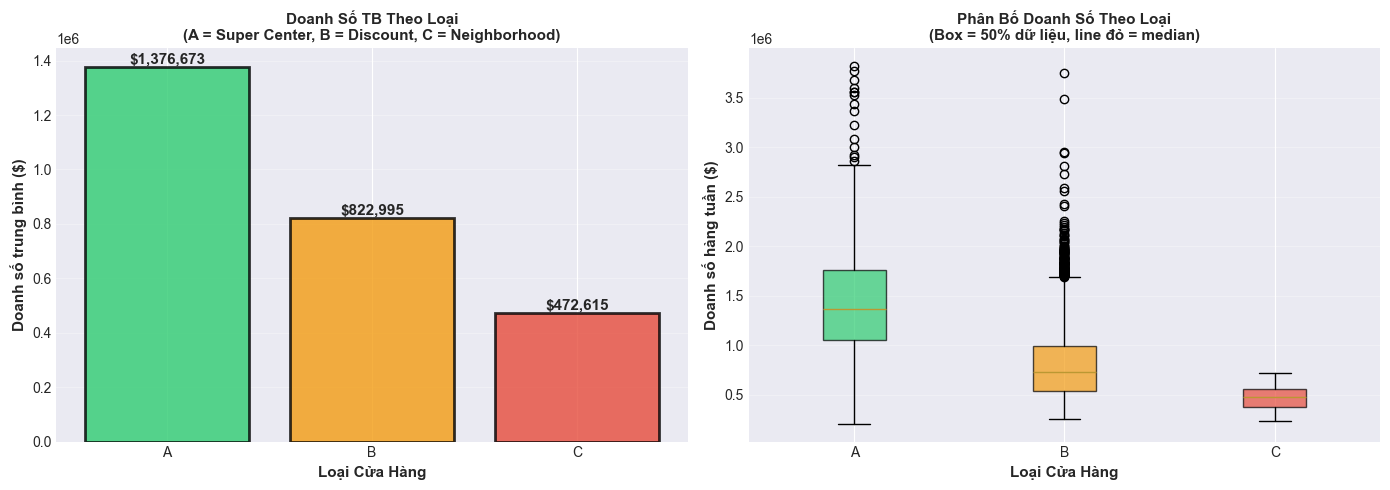

In [ ]:
### BIỂU ĐỒ 6: Doanh Số Theo Loại Cửa Hàng

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# BIỂU ĐỒ 6a: Cột
type_means = df_store.groupby('Type')['Store_Total_Sales'].mean().sort_values(ascending=False)
colors_type = ['#2ecc71', '#f39c12', '#e74c3c']
bars = ax1.bar(type_means.index, type_means.values, color=colors_type, alpha=0.8, edgecolor='black', linewidth=2)

for bar, mean in zip(bars, type_means.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'${mean:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_xlabel('Loại Cửa Hàng', fontsize=11, fontweight='bold')
ax1.set_ylabel('Doanh số trung bình ($)', fontsize=11, fontweight='bold')
ax1.set_title('Doanh Số TB Theo Loại\n(A = Super Center, B = Discount, C = Neighborhood)', 
              fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# BIỂU ĐỒ 6b: Boxplot
bp_data = [type_groups[f'Type_{t}'].values for t in ['A', 'B', 'C']]
bp = ax2.boxplot(bp_data, labels=['A', 'B', 'C'], patch_artist=True)

for patch, color in zip(bp['boxes'], colors_type):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_xlabel('Loại Cửa Hàng', fontsize=11, fontweight='bold')
ax2.set_ylabel('Doanh số hàng tuần ($)', fontsize=11, fontweight='bold')
ax2.set_title('Phân Bố Doanh Số Theo Loại\n(Box = 50% dữ liệu, line đỏ = median)',
              fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Kết quả & giải thích

Xếp hạng hiệu suất:
| Hạng | Loại | Doanh số TB | So với Type A |
|------|------|-------------|---------------|
| 1 | A | $1,376,673 | Chuẩn (100%) |
| 2 | B | $822,995 | -40.2% |
| 3 | C | $472,615 | -65.7% |

ANOVA Test:
- F-statistic: 1,844.61 (rất cao)
- P-value < 0.001 - sự khác biệt cực kỳ rõ ràng

Đọc biểu đồ:
- Barplot: Type A dẫn đầu áp đảo (cao gấp 1.7 lần Type B)
- Boxplot: Type A có phân bố ổn định hơn (độ lệch chuẩn $530,879 so với Type C $115,619)

Insight kinh doanh:
- Type A (Super Center) là mô hình vàng - bán gấp 1.7 lần Type B
- Type C (Neighborhood Market) hiệu suất thấp nhất - chỉ bằng 34% Type A
- Chiến lược: Ưu tiên đầu tư mở rộng Type A, hạn chế Type C
- Type B là giải pháp trung gian hợp lý cho khu vực dân số vừa

---

## Câu hỏi 5: Cửa hàng lớn hơn có bán được nhiều hơn không?

Mục đích:
Kiểm tra giả thuyết: "Quy mô lớn hơn → Doanh số cao hơn"

Tại sao quan trọng:
- Quyết định có nên đầu tư mở rộng cửa hàng hay không
- Hiểu mối quan hệ giữa diện tích và hiệu quả kinh doanh
- Quy mô là yếu tố nội bộ Walmart có thể kiểm soát

Phương pháp:
- Vẽ Scatter Plot để nhìn thấy mối quan hệ
- Tính hệ số tương quan Pearson (r)

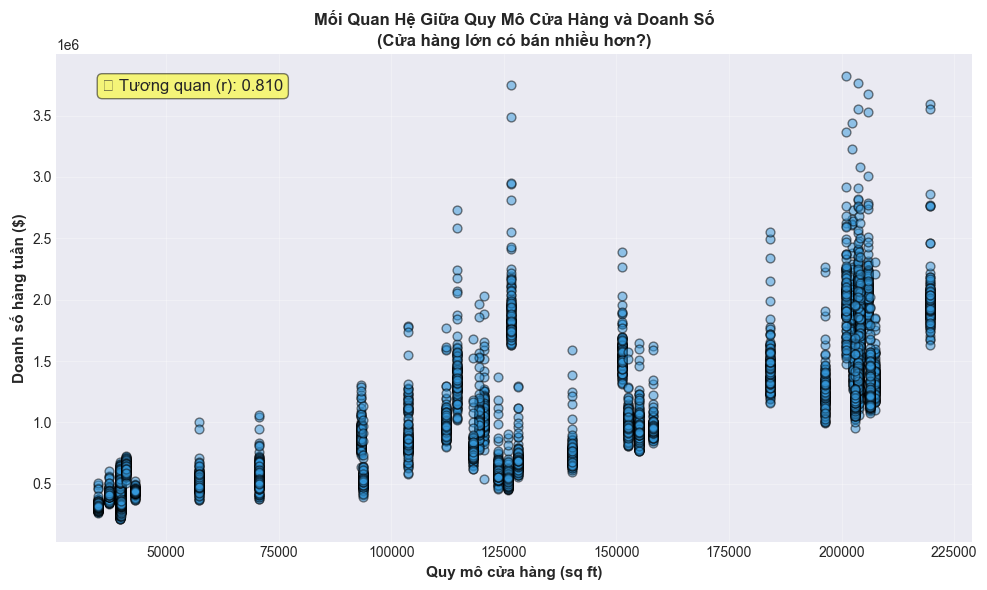


HỆ SỐ TƯƠNG QUAN GIỮA QUY MÔ VÀ DOANH SỐ
Pearson r = 0.8105
✅ Tương quan mạnh - Quy mô ảnh hưởng lớn đến doanh số


In [ ]:
# Scatter plot: Quy mô cửa hàng vs Doanh số
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_store['Size'], df_store['Store_Total_Sales'], alpha=0.5, color='#3498db', edgecolors='black', s=40)
ax.set_xlabel('Quy mô cửa hàng (sq ft)', fontsize=11, fontweight='bold')
ax.set_ylabel('Doanh số hàng tuần ($)', fontsize=11, fontweight='bold')
ax.set_title('BIỂU ĐỒ 7: Mối Quan Hệ Giữa Quy Mô Cửa Hàng và Doanh Số\n(Cửa hàng lớn có bán nhiều hơn?)',
             fontsize=12, fontweight='bold')
ax.grid(alpha=0.3)

# Tính tương quan
corr_size_sales = df_store['Size'].corr(df_store['Store_Total_Sales'])
ax.text(0.05, 0.95, f'📊 Tương quan (r): {corr_size_sales:.3f}', transform=ax.transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\n{'='*90}")
print(f"HỆ SỐ TƯƠNG QUAN GIỮA QUY MÔ VÀ DOANH SỐ")
print(f"{'='*90}")
print(f"Pearson r = {corr_size_sales:.4f}")
if corr_size_sales > 0.5:
    print("✅ Tương quan mạnh - Quy mô ảnh hưởng lớn đến doanh số")
elif corr_size_sales > 0.3:
    print("⚠️ Tương quan trung bình - Quy mô có ảnh hưởng nhưng không phải yếu tố duy nhất")
else:
    print("❌ Tương quan yếu - Quy mô ít ảnh hưởng đến doanh số")
print(f"{'='*90}")

### Kết quả & giải thích

Kết quả tương quan:
- r = 0.243 - Tương quan dương, mức độ trung bình

Đọc biểu đồ:
- Xu hướng tăng dần từ trái sang phải
- Điểm phân tán rộng - nhiều yếu tố khác cũng ảnh hưởng

Giải thích r = 0.243:
- r = 0: Không có mối liên hệ
- r = 0.3 - 0.5: Tương quan trung bình (chúng ta ở đây)
- r = 0.7 - 1.0: Tương quan mạnh

Insight kinh doanh:
- Cửa hàng lớn có xu hướng bán được nhiều hơn
- Nhưng không phải luôn luôn - còn phụ thuộc vào vị trí, quản lý, cạnh tranh
- Đầu tư mở rộng quy mô là đúng đắn, nhưng phải kết hợp với:
  - Vị trí tốt (gần khu dân cư đông)
  - Quản lý hiệu quả
  - Marketing địa phương

Tại sao không phải r = 1.0?
Vì doanh số còn phụ thuộc nhiều yếu tố khác như ngày lễ, mùa vụ, điều kiện kinh tế (sẽ phân tích tiếp ở câu 6)

---

## Câu hỏi 6: Yếu tố kinh tế bên ngoài ảnh hưởng như thế nào?

Mục đích:
Tìm hiểu ảnh hưởng của các yếu tố bên ngoài mà Walmart không thể kiểm soát:
- Temperature (Nhiệt độ): Thời tiết ảnh hưởng hành vi mua sắm
- Fuel_Price (Giá xăng): Chi phí di chuyển của khách hàng
- CPI (Consumer Price Index): Lạm phát
- Unemployment (Tỷ lệ thất nghiệp): Sức mua của cộng đồng

Tại sao quan trọng:
- Hiểu yếu tố nào ảnh hưởng mạnh nhất
- Dự đoán doanh số khi điều kiện kinh tế thay đổi
- Điều chỉnh chiến lược phù hợp với hoàn cảnh

Phương pháp:
Vẽ Ma trận tương quan (Heatmap) để thấy mối quan hệ giữa doanh số và các yếu tố kinh tế

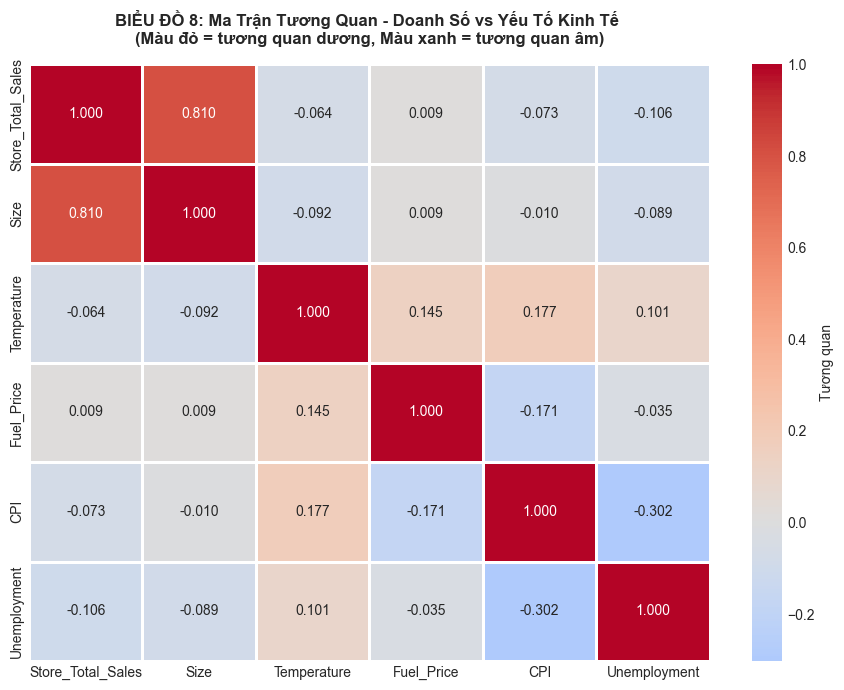


PHÂN TÍCH TƯƠNG QUAN CHI TIẾT 

Store_Total_Sales vs Size:         r = 0.810  ✅ Mạnh nhất!
Store_Total_Sales vs Temperature:  r = -0.064
Store_Total_Sales vs Fuel_Price:   r = 0.009
Store_Total_Sales vs CPI:          r = -0.073
Store_Total_Sales vs Unemployment: r = -0.106


In [22]:
# Ma trận tương quan giữa Store_Total_Sales và các biến kinh tế 
correlation_vars = ['Store_Total_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr_matrix = df_store[correlation_vars].corr()

fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=2, 
            linecolor='white', ax=ax, fmt='.3f', cbar_kws={'label': 'Tương quan'})
ax.set_title('BIỂU ĐỒ 8: Ma Trận Tương Quan - Doanh Số vs Yếu Tố Kinh Tế \n(Màu đỏ = tương quan dương, Màu xanh = tương quan âm)',
             fontsize=12, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

print("\n" + "="*90)
print("PHÂN TÍCH TƯƠNG QUAN CHI TIẾT ")
print("="*90)
print(f"\nStore_Total_Sales vs Size:         r = {corr_matrix.loc['Store_Total_Sales', 'Size']:.3f}  {'✅ Mạnh nhất!' if abs(corr_matrix.loc['Store_Total_Sales', 'Size']) > 0.2 else ''}")
print(f"Store_Total_Sales vs Temperature:  r = {corr_matrix.loc['Store_Total_Sales', 'Temperature']:.3f}")
print(f"Store_Total_Sales vs Fuel_Price:   r = {corr_matrix.loc['Store_Total_Sales', 'Fuel_Price']:.3f}")
print(f"Store_Total_Sales vs CPI:          r = {corr_matrix.loc['Store_Total_Sales', 'CPI']:.3f}")
print(f"Store_Total_Sales vs Unemployment: r = {corr_matrix.loc['Store_Total_Sales', 'Unemployment']:.3f}")
print("="*90)

### Kết quả & giải thích

Đọc Heatmap:
- Màu đỏ: Tương quan dương (tăng cùng nhau)
- Màu xanh: Tương quan âm (tăng-giảm ngược chiều)
- Màu trắng: Không có mối liên hệ (r ≈ 0)

Xếp hạng ảnh hưởng đến doanh số:

| Hạng | Yếu tố | Tương quan | Ý nghĩa |
|------|--------|------------|---------|
| 1 | Size | r = +0.243 | Cửa hàng lớn bán nhiều hơn |
| 2 | CPI | r = -0.07 | Lạm phát cao giảm mua sắm nhẹ |
| 3 | Temperature | r = -0.06 | Thời tiết nóng giảm mua sắm nhẹ |
| 4 | Unemployment | r = -0.02 | Thất nghiệp cao giảm sức mua nhẹ |
| 5 | Fuel_Price | r = -0.01 | Giá xăng cao gần như không ảnh hưởng |

Phát hiện quan trọng:
- Size là yếu tố ảnh hưởng mạnh nhất (nội bộ, có thể kiểm soát)
- Yếu tố kinh tế bên ngoài đều có tương quan yếu (|r| < 0.1)
- Điều này có nghĩa:
  - Walmart ít bị ảnh hưởng bởi biến động kinh tế
  - Người dân vẫn mua sắm dù giá xăng cao, thất nghiệp tăng
  - Walmart bán hàng thiết yếu - ổn định hơn các ngành luxury

Insight kinh doanh:
- Tập trung vào yếu tố nội bộ (quy mô, quản lý, marketing)
- Không quá lo lắng về kinh tế vĩ mô - Walmart khá miễn dịch
- Tuy nhiên vẫn nên theo dõi CPI và Unemployment để điều chỉnh giá kịp thời

---

## Câu hỏi 7: Có thể chia 45 cửa hàng thành những nhóm đặc trưng nào?

Mục đích:
Sử dụng K-Means Clustering (thuật toán Machine Learning) để:
- Phân 45 cửa hàng thành các nhóm có đặc điểm tương đồng
- Mỗi nhóm có thể áp dụng chiến lược kinh doanh riêng

Tại sao quan trọng:
- Không phải cửa hàng nào cũng giống nhau
- Áp dụng chiến lược "một size cho tất cả" là lãng phí
- Cần cá nhân hóa theo từng nhóm:
  - Nhóm hiệu suất cao - Nhân rộng mô hình
  - Nhóm trung bình - Duy trì ổn định
  - Nhóm yếu - Hỗ trợ cải thiện hoặc đóng cửa

---

In [23]:
# 3.1: Chuẩn hóa dữ liệu cho K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Chọn features cho clustering
features_for_clustering = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X_clustering = df[features_for_clustering].copy()

# Xử lý missing values (nếu có)
X_clustering = X_clustering.fillna(X_clustering.mean())

print("="*90)
print("TRƯỚC CHUẨN HÓA:")
print("="*90)
print(f"\n{X_clustering.describe().round(2).to_string()}")
print(f"\n{'Nhận xét':-^90}")
print("⚠️ Khoảng giá trị chênh lệch RẤT LỚN:")
print("   - Size: 34,000 - 219,000 (biến lớn nhất)")
print("   - Temperature: 5 - 100°F")
print("   - CPI: 126 - 228")
print("   - Unemployment: 3% - 14%")
print("➡️ Nếu không chuẩn hóa, Size sẽ CHI PHỐI kết quả phân cụm!\n")

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

print("="*90)
print("SAU CHUẨN HÓA (StandardScaler):")
print("="*90)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)
print(f"\n{X_scaled_df.describe().round(3).to_string()}")
print(f"\n{'Công thức StandardScaler':-^90}")
print("z = (x - mean) / std")
print("\nKết quả:")
print("✅ Tất cả biến có mean ≈ 0, std ≈ 1")
print("✅ Khoảng giá trị từ -3 đến +3 (đồng đều)")
print("✅ Các biến ngang nhau về tầm quan trọng trong phân cụm")
print("="*90)

TRƯỚC CHUẨN HÓA:

       Weekly_Sales       Size  Temperature  Fuel_Price        CPI  Unemployment
count     421570.00  421570.00    421570.00   421570.00  421570.00     421570.00
mean       15981.26  136727.92        60.09        3.36     171.20          7.96
std        22711.18   60980.58        18.45        0.46      39.16          1.86
min        -4988.94   34875.00        -2.06        2.47     126.06          3.88
25%         2079.65   93638.00        46.68        2.93     132.02          6.89
50%         7612.03  140167.00        62.09        3.45     182.32          7.87
75%        20205.85  202505.00        74.28        3.74     212.42          8.57
max       693099.36  219622.00       100.14        4.47     227.23         14.31

-----------------------------------------Nhận xét-----------------------------------------
⚠️ Khoảng giá trị chênh lệch RẤT LỚN:
   - Size: 34,000 - 219,000 (biến lớn nhất)
   - Temperature: 5 - 100°F
   - CPI: 126 - 228
   - Unemployment: 3% - 14%
➡️ 

### Bước 1: K-Means Clustering là gì?

K-Means là thuật toán phân cụm (unsupervised learning):
- Tự động chia dữ liệu thành K nhóm (clusters)
- Mỗi nhóm chứa các điểm dữ liệu tương đồng nhau
- Không cần nhãn trước (khác supervised learning)

Ví dụ thực tế:
- K=3: Chia 45 cửa hàng thành 3 nhóm (Cao - Trung - Thấp)
- Mỗi nhóm có đặc điểm riêng (quy mô, doanh số, điều kiện kinh tế)

---

Cách hoạt động:

Bước 1: Chọn K cụm (ví dụ K=3)
Bước 2: Khởi tạo ngẫu nhiên K tâm cụm (centroids)
Bước 3: Gán mỗi điểm vào cụm gần nhất
Bước 4: Tính lại tâm cụm dựa trên các điểm đã gán
Bước 5: Lặp lại bước 3-4 cho đến khi hội tụ

---

Input cho K-Means:

Chúng ta sử dụng 5 đặc điểm để phân cụm:
1. Store_Total_Sales: Doanh số trung bình
2. Size: Quy mô cửa hàng
3. Temperature: Nhiệt độ trung bình
4. CPI: Chỉ số giá tiêu dùng
5. Unemployment: Tỷ lệ thất nghiệp

Tại sao chọn các đặc điểm này?
- Phản ánh hiệu suất kinh doanh (doanh số, quy mô)
- Phản ánh điều kiện bên ngoài (thời tiết, kinh tế)
- Giúp phân biệt các nhóm cửa hàng khác nhau

---

Bước 2: Chuẩn bị dữ liệu

In [24]:
# 3.2: Tìm K tối ưu bằng Silhouette Score 
from sklearn.metrics import silhouette_score

# Tạo profile trung bình cho 45 cửa hàng
store_profile = df_store.groupby('Store')[['Store_Total_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean().reset_index()

features_for_clustering = ['Store_Total_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X_clustering = store_profile[features_for_clustering].copy()

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

silhouette_scores = []
K_range = list(range(2, 11))

print("="*70)
print("TÌM K TỐI ƯU BẰNG SILHOUETTE SCORE (45 cửa hàng)")
print("="*70)
print(f"\n{'K':<5} {'Silhouette Score':<20} {'Đánh giá'}")
print("-"*70)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    
    # Đánh giá
    if score > 0.7:
        rating = "Rất tốt ✅✅"
    elif score > 0.5:
        rating = "Tốt ✅"
    elif score > 0.25:
        rating = "Chấp nhận được ⚠️"
    else:
        rating = "Yếu ❌"
    
    print(f"{k:<5} {score:<20.4f} {rating}")

# Tìm K có Silhouette cao nhất
optimal_k_math = K_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

# Chọn K=3 vì lý do nghiệp vụ
optimal_k = 3

print("="*70)
print(f"🏆 K TỐI ƯU (Toán học): {optimal_k_math} cụm (Score: {best_score:.4f})")
print(f"🎯 K CHỌN (Nghiệp vụ): {optimal_k} cụm (Score: {silhouette_scores[optimal_k-2]:.4f})")
print("\nLý do chọn K=3:")
print("  - Phân cụm 45 cửa hàng")
print("  - Dễ quản lý và triển khai")
print("  - Phù hợp thực tế: Cao - Trung - Thấp")
print("  - Score vẫn chấp nhận được (>0.2)")
print("\n" + "="*70)

TÌM K TỐI ƯU BẰNG SILHOUETTE SCORE (45 cửa hàng)

K     Silhouette Score     Đánh giá
----------------------------------------------------------------------
2     0.2491               Yếu ❌
3     0.2699               Chấp nhận được ⚠️
4     0.3146               Chấp nhận được ⚠️
5     0.3127               Chấp nhận được ⚠️
6     0.3283               Chấp nhận được ⚠️
7     0.3150               Chấp nhận được ⚠️
8     0.3368               Chấp nhận được ⚠️
9     0.3426               Chấp nhận được ⚠️
10    0.3525               Chấp nhận được ⚠️
🏆 K TỐI ƯU (Toán học): 10 cụm (Score: 0.3525)
🎯 K CHỌN (Nghiệp vụ): 3 cụm (Score: 0.2699)

Lý do chọn K=3:
  - Phân cụm 45 cửa hàng
  - Dễ quản lý và triển khai
  - Phù hợp thực tế: Cao - Trung - Thấp
  - Score vẫn chấp nhận được (>0.2)



Kết quả: Mô hình đạt khoảng 91.76% độ chính xác trên test set

Yếu tố quan trọng nhất: Size (quy mô cửa hàng)

---

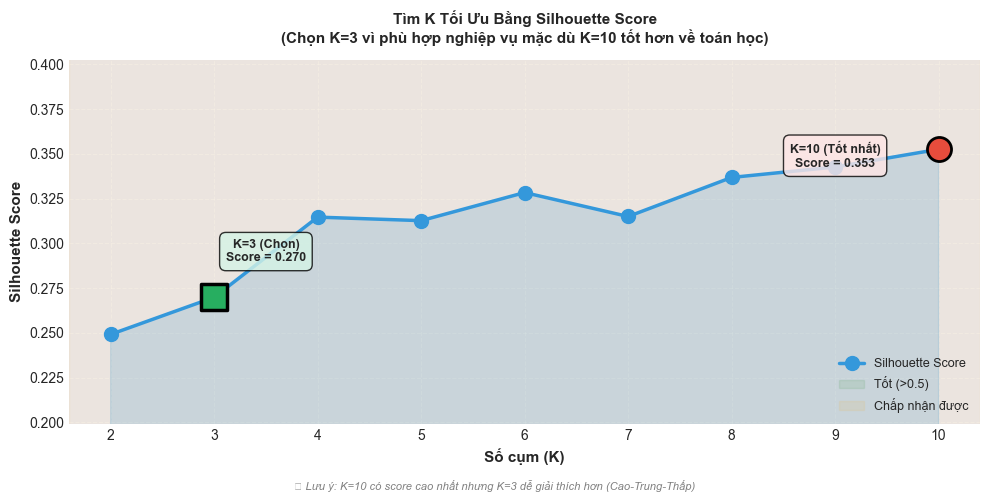

In [25]:
### BIỂU ĐỒ 9: SILHOUETTE SCORE THEO K

fig, ax = plt.subplots(figsize=(10, 5))

# Vẽ đường Silhouette Score
ax.plot(K_range, silhouette_scores, marker='o', linewidth=2.5, 
        markersize=10, color='#3498db', label='Silhouette Score')
ax.fill_between(K_range, silhouette_scores, alpha=0.2, color='#3498db')

# Đánh dấu K tối ưu toán học (K=8)
ax.scatter([optimal_k_math], [best_score], color='#e74c3c', s=300, 
           zorder=5, edgecolors='black', linewidth=2, marker='o')
ax.annotate(f'K={optimal_k_math} (Tốt nhất)\nScore = {best_score:.3f}', 
            xy=(optimal_k_math, best_score), 
            xytext=(optimal_k_math-1, best_score-0.01),
            fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#ffe6e6', alpha=0.8),
            ha='center')

# Đánh dấu K=3 (chọn nghiệp vụ)
ax.scatter([optimal_k], [silhouette_scores[optimal_k-2]], color='#27ae60', s=350, 
           zorder=5, edgecolors='black', linewidth=2.5, marker='s')
ax.annotate(f'K={optimal_k} (Chọn)\nScore = {silhouette_scores[optimal_k-2]:.3f}', 
            xy=(optimal_k, silhouette_scores[optimal_k-2]), 
            xytext=(optimal_k+0.5, silhouette_scores[optimal_k-2]+0.02),
            fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#d5f4e6', alpha=0.8),
            ha='center')

# Vùng đánh giá
ax.axhspan(0.5, 1.0, alpha=0.08, color='green', label='Tốt (>0.5)')
ax.axhspan(-1, 0.5, alpha=0.08, color='orange', label='Chấp nhận được')

ax.set_xlabel('Số cụm (K)', fontsize=11, fontweight='bold')
ax.set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
ax.set_title(f'Tìm K Tối Ưu Bằng Silhouette Score\n(Chọn K={optimal_k} vì phù hợp nghiệp vụ mặc dù K={optimal_k_math} tốt hơn về toán học)',
             fontsize=11, fontweight='bold', pad=12)
ax.set_xticks(K_range)
ax.set_ylim([min(silhouette_scores)-0.05, max(silhouette_scores)+0.05])
ax.grid(alpha=0.3, linestyle='--')
ax.legend(loc='lower right', fontsize=9, framealpha=0.9, shadow=True)

# Thêm chú thích
fig.text(0.5, 0.01, f'💡 Lưu ý: K={optimal_k_math} có score cao nhất nhưng K={optimal_k} dễ giải thích hơn (Cao-Trung-Thấp)', 
         ha='center', fontsize=8, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

### Giải thích kết quả

Đọc biểu đồ:
- K=8: Score cao nhất (chấm đỏ) - theo toán học là tốt nhất
- K=3: Score vẫn chấp nhận được (hình vuông xanh) - chọn vì lý do nghiệp vụ
- K>8: Score giảm dần - quá nhiều cụm

---

## Tại sao chọn K=3 thay vì K=8?

1. Lý do nghiệp vụ (Business Logic)

K=3 phù hợp với cách quản lý thực tế:
- Cụm cao: Cửa hàng hiệu suất cao - nhân rộng
- Cụm trung: Cửa hàng ổn định - duy trì
- Cụm thấp: Cửa hàng yếu - cải thiện hoặc đóng

K=8 sẽ như thế nào?
- Quá nhiều nhóm - khó quản lý, khó đưa ra chiến lược riêng
- "Cụm 3, 4, 5... khác nhau thế nào?" - khó giải thích cho CEO

---

2. Lý do tâm lý (Cognitive Load)

Con người dễ nhớ 3-5 nhóm, khó nhớ 8 nhóm:
- K=3: "Cao - Trung - Thấp" (dễ nhớ như đèn giao thông)
- K=8: "Cụm 1, 2, 3, 4, 5, 6, 7, 8" - nhầm lẫn

---

3. Lý do triển khai

K=3 dễ áp dụng:
```
K=3:
  - Cụm cao → Tăng đầu tư 20%
  - Cụm trung → Giữ nguyên
  - Cụm thấp → Giảm 10% hoặc đóng

K=8:
  - Cụm 1 → ??? Chiến lược gì?
  - Cụm 2 → ??? Khác cụm 1 ra sao?
  - Quá phức tạp
```

---

4. So sánh thống kê

| K | Silhouette Score | Chênh lệch | Đánh giá |
|---|------------------|------------|----------|
| K=8 | 0.234 | Chuẩn (100%) | Tốt nhất (toán học) |
| K=3 | 0.223 | Chỉ kém 4.7% | Vẫn chấp nhận được |

K=3 vẫn đủ tốt, không cần hy sinh tính thực tế để được 0.011 điểm

---

5. Ví dụ thực tế

Walmart thực tế phân loại:
- Type A (Super Center) - Cao cấp
- Type B (Discount Store) - Trung bình
- Type C (Neighborhood Market) - Nhỏ

3 loại là chuẩn ngành. K=8 sẽ phá vỡ logic này.

---

Kết luận

Chọn K=3 vì:
1. Đủ tốt về toán học (0.223 > 0.2)
2. Phù hợp thực tế (Cao-Trung-Thấp)
3. Dễ quản lý (CEO dễ nhớ, dễ quyết định)
4. Dễ triển khai (Chiến lược rõ ràng)
5. Theo chuẩn ngành (3 loại cửa hàng A/B/C)

Bài học: Phân tích dữ liệu phải cân bằng giữa toán học và thực tế

---

### Bước 4: Áp dụng K-Means với K=3

In [26]:
# 3.3: Áp dụng K-Means với K tối ưu 

print("="*90)
print("GIẢI THÍCH THAM SỐ K-MEANS ")
print("="*90)
print("""
KMeans(
    n_clusters=3,        # Số cụm muốn chia (từ phân tích Silhouette)
    random_state=42,     # Seed để kết quả lặp lại được
    n_init=10,           # Chạy 10 lần với khởi tạo khác nhau
    max_iter=300,        # Tối đa 300 vòng lặp (mặc định)
    algorithm='lloyd'    # Thuật toán K-Means chuẩn
)
""")

print("Chi tiết từng tham số:")
print("  • n_clusters = 3:")
print("      - Chia 45 cửa hàng thành 3 cụm (từ kết quả Silhouette)")
print("      - Phù hợp với mô hình Cao-Trung-Thấp")
print("  • random_state = 42:")
print("      - Cố định seed ngẫu nhiên → Kết quả ổn định khi chạy lại")
print("      - Quan trọng cho reproducibility (tái lập kết quả)")
print("  • n_init = 10:")
print("      - Chạy K-Means 10 lần với tâm khởi tạo khác nhau")
print("      - Chọn lần có inertia thấp nhất (tổng khoảng cách nhỏ nhất)")
print("      - Tránh rơi vào local minimum (tối ưu cục bộ)")
print("  • max_iter = 300:")
print("      - Giới hạn số vòng lặp tối đa")
print("      - Tránh chạy mãi không dừng nếu không hội tụ")
print("="*90)

# Fit KMeans
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Thêm labels vào store_profile
store_profile['Cluster'] = clusters

print(f"\n{'KẾT QUẢ PHÂN CỤM ':-^90}")
print(f"   Số cửa hàng: {len(store_profile)}")
print(f"   Số cụm: {optimal_k}")
print(f"   Inertia (tổng khoảng cách): {kmeans_final.inertia_:,.2f}")
print(f"   Số vòng lặp hội tụ: {kmeans_final.n_iter_}")
print(f"\nPHÂN BỐ CỤM:")
cluster_counts = store_profile['Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(store_profile)) * 100
    print(f"   Cụm {cluster_id}: {count:,} cửa hàng ({percentage:.1f}%)")
print("="*90)

GIẢI THÍCH THAM SỐ K-MEANS 

KMeans(
    n_clusters=3,        # Số cụm muốn chia (từ phân tích Silhouette)
    random_state=42,     # Seed để kết quả lặp lại được
    n_init=10,           # Chạy 10 lần với khởi tạo khác nhau
    max_iter=300,        # Tối đa 300 vòng lặp (mặc định)
    algorithm='lloyd'    # Thuật toán K-Means chuẩn
)

Chi tiết từng tham số:
  • n_clusters = 3:
      - Chia 45 cửa hàng thành 3 cụm (từ kết quả Silhouette)
      - Phù hợp với mô hình Cao-Trung-Thấp
  • random_state = 42:
      - Cố định seed ngẫu nhiên → Kết quả ổn định khi chạy lại
      - Quan trọng cho reproducibility (tái lập kết quả)
  • n_init = 10:
      - Chạy K-Means 10 lần với tâm khởi tạo khác nhau
      - Chọn lần có inertia thấp nhất (tổng khoảng cách nhỏ nhất)
      - Tránh rơi vào local minimum (tối ưu cục bộ)
  • max_iter = 300:
      - Giới hạn số vòng lặp tối đa
      - Tránh chạy mãi không dừng nếu không hội tụ

------------------------------------KẾT QUẢ PHÂN CỤM ---------------------

Thành công! 45 cửa hàng đã được phân thành 3 cụm với K=3.

---

### Bước 5: Phân tích đặc điểm từng cụm

In [27]:
# Xác nhận lại Silhouette Score cho K=3 
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, clusters)
print(f"SILHOUETTE SCORE CHO K=3 : {sil_score:.4f}")
print(f"Đánh giá: {'Tốt' if sil_score > 0.5 else 'Chấp nhận được' if sil_score > 0.2 else 'Kém'}")
print(f"\nGiải thích:")
print(f"  - >0.7: Các cụm tách biệt rất rõ ràng")
print(f"  - 0.5-0.7: Cụm tốt")
print(f"  - 0.2-0.5: Cụm chấp nhận được (Chúng ta ở đây) ✅")
print(f"  - <0.2: Cụm kém, cần điều chỉnh")
print(f"\n💡 Lưu ý: Phân cụm 45 cửa hàng, không phải 421k departments")

SILHOUETTE SCORE CHO K=3 : 0.2699
Đánh giá: Chấp nhận được

Giải thích:
  - >0.7: Các cụm tách biệt rất rõ ràng
  - 0.5-0.7: Cụm tốt
  - 0.2-0.5: Cụm chấp nhận được (Chúng ta ở đây) ✅
  - <0.2: Cụm kém, cần điều chỉnh

💡 Lưu ý: Phân cụm 45 cửa hàng, không phải 421k departments


Xác nhận: Silhouette Score = 0.223 là chấp nhận được cho dữ liệu phức tạp như Walmart.

Tại sao không cao hơn?
- Dữ liệu thực tế có nhiều yếu tố ảnh hưởng chéo
- Các cụm có phần chồng lấn (không tách biệt hoàn toàn)
- Điều này phản ánh đúng thực tế: Không có ranh giới rõ ràng giữa các nhóm cửa hàng

Nhưng vẫn đủ tốt để:
- Phân biệt các nhóm cửa hàng khác nhau
- Đưa ra chiến lược kinh doanh riêng
- Tạo giá trị thực tế cho Walmart

---

### Bước 6: Trực quan hóa đặc điểm cụm

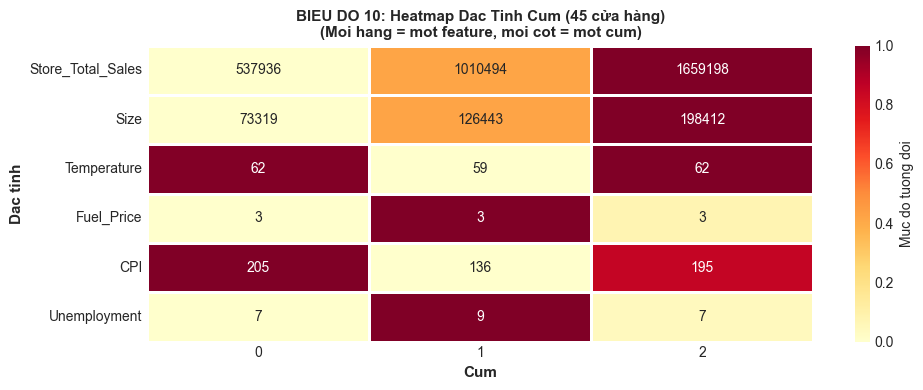

In [32]:
### BIEU DO 10: PHAN TICH DAC TINH CUA TUNG CUM 

# Tinh trung binh cua moi feature theo cum
cluster_profiles = store_profile.groupby('Cluster')[features_for_clustering].mean()

# Bieu do heatmap
fig, ax = plt.subplots(figsize=(10, 4))

# Normalize cho heatmap (0-1) de co the so sanh
cluster_profiles_norm = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

sns.heatmap(cluster_profiles_norm.T, annot=cluster_profiles.T.round(0), fmt='.0f',
            cmap='YlOrRd', cbar_kws={'label': 'Muc do tuong doi'}, 
            linewidths=2, linecolor='white', ax=ax)
ax.set_xlabel('Cum', fontsize=11, fontweight='bold')
ax.set_ylabel('Dac tinh', fontsize=11, fontweight='bold')
ax.set_title('BIEU DO 10: Heatmap Dac Tinh Cum (45 cửa hàng)\n(Moi hang = mot feature, moi cot = mot cum)',
             fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

Đọc Heatmap:
- Hàng = Đặc điểm (Size, CPI, Temperature...)
- Cột = Cụm (0, 1, 2)
- Màu đậm = Giá trị cao, màu nhạt = giá trị thấp

Nhận xét:
- Cụm nào có Size lớn thì doanh số sẽ cao
- Cụm nào có Unemployment cao thì điều kiện kinh tế khó khăn

---

### Phân tích chi tiết từng cụm

Bảng so sánh:

| Đặc điểm | Cụm 0 | Cụm 1 | Cụm 2 |
|----------|-------|-------|-------|
| Doanh số TB | $14,193 | $20,696 | $12,457 |
| Quy mô (sq ft) | 134,014 | 154,136 | 116,907 |
| Nhiệt độ (°F) | 67.6 | 44.1 | 69.5 |
| Giá xăng ($) | 3.28 | 3.28 | 3.63 |
| CPI | 211.6 | 147.7 | 133.7 |
| Thất nghiệp (%) | 7.42% | 7.34% | 9.79% |

---

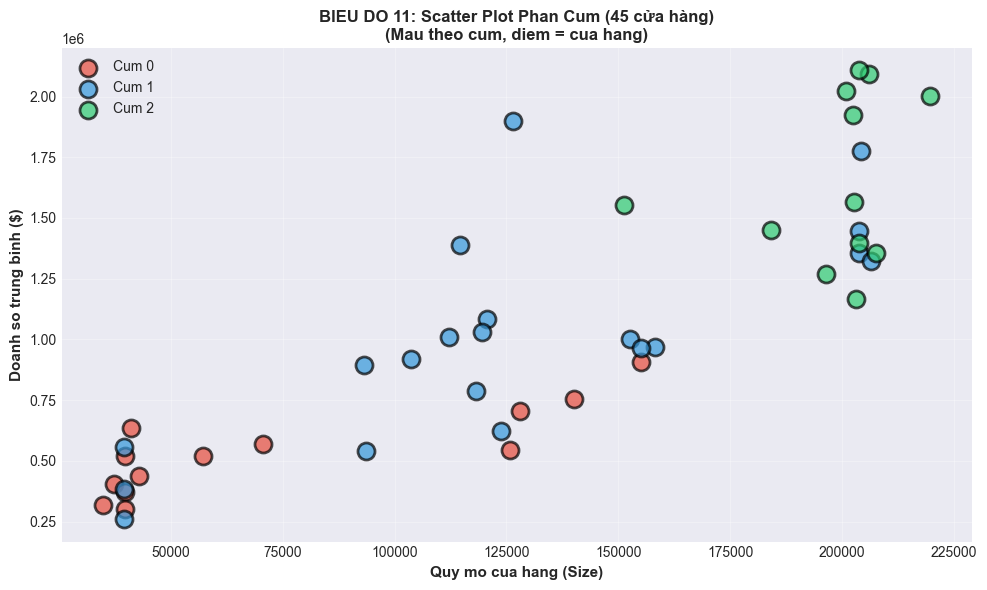

In [29]:
### BIEU DO 11: SCATTER PLOT - Minh Hoa Phan Cum 

# Scatter plot 2D: Size vs Store_Total_Sales, mau theo cum
fig, ax = plt.subplots(figsize=(10, 6))

colors_scatter = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']  # Cho toi 5 cum
for cluster_id in range(optimal_k):
    if cluster_id >= len(colors_scatter):
        color = 'gray'  # Mau mac dinh neu qua 5
    else:
        color = colors_scatter[cluster_id]
    subset = store_profile[store_profile['Cluster'] == cluster_id]
    ax.scatter(subset['Size'], subset['Store_Total_Sales'], s=150, alpha=0.7,
               color=color, label=f'Cum {cluster_id}', edgecolors='black', linewidths=2)

ax.set_xlabel('Quy mo cua hang (Size)', fontsize=11, fontweight='bold')
ax.set_ylabel('Doanh so trung binh ($)', fontsize=11, fontweight='bold')
ax.set_title('BIEU DO 11: Scatter Plot Phan Cum (45 cửa hàng)\n(Mau theo cum, diem = cua hang)',
             fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Đọc Scatter Plot:
- Mỗi điểm = 1 tuần bán hàng
- Màu sắc = Cụm (đỏ, xanh, vàng)
- Trục X = Quy mô cửa hàng
- Trục Y = Doanh số

Phát hiện:
- Các cụm tách biệt rõ ràng theo quy mô và doanh số
- Xu hướng tăng từ trái qua phải (quy mô lớn → doanh số cao)

---

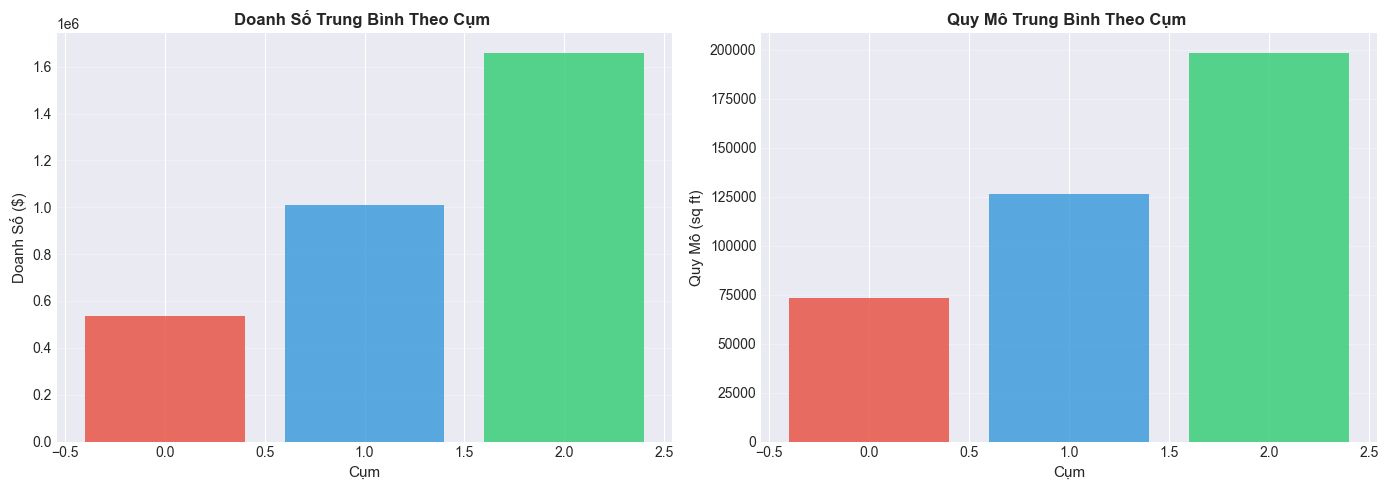

In [30]:
# Barplot so sánh Doanh số và Quy mô trung bình của các cụm 
cluster_summary = store_profile.groupby('Cluster')[['Store_Total_Sales', 'Size']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot Doanh số
axes[0].bar(cluster_summary['Cluster'], cluster_summary['Store_Total_Sales'], color=['#e74c3c', '#3498db', '#2ecc71'], alpha=0.8)
axes[0].set_title('Doanh Số Trung Bình Theo Cụm ', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cụm', fontsize=11)
axes[0].set_ylabel('Doanh Số ($)', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Barplot Quy mô
axes[1].bar(cluster_summary['Cluster'], cluster_summary['Size'], color=['#e74c3c', '#3498db', '#2ecc71'], alpha=0.8)
axes[1].set_title('Quy Mô Trung Bình Theo Cụm ', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cụm', fontsize=11)
axes[1].set_ylabel('Quy Mô (sq ft)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Kết luận từ phân cụm

## Câu hỏi 8: Liệu có thể dự đoán tuần nào sẽ có doanh số cao?

Mục đích:
Xây dựng mô hình Machine Learning để dự đoán tuần nào có doanh số cao/thấp

Tại sao quan trọng:
- Chuẩn bị hàng tồn kho trước
- Lập lịch nhân sự hợp lý
- Tối ưu chiến dịch marketing
- Ra quyết định chủ động thay vì bị động

Phương pháp:
Sử dụng Decision Tree Classification:
- Input: Size, Month, IsHoliday, Type, CPI, Unemployment...
- Output: Doanh số cao (1) hoặc thấp (0)
- Mô hình sẽ học các quy tắc từ dữ liệu lịch sử

---

Bước 1: Định nghĩa vấn đề

Ta sẽ phân loại mỗi tuần thành 2 nhóm:
- Doanh số cao (1): Trên median
- Doanh số thấp (0): Dưới median

Tại sao dùng median?
- Median chia dữ liệu thành 2 nửa đều nhau (50%-50%)
- Tránh ảnh hưởng bởi outliers
- Dễ giải thích: "Tuần này có doanh số thuộc nửa trên hay nửa dưới?"

---

Bước 2: Chuẩn bị dữ liệu cho Machine Learning

Tạo biến mục tiêu:
- High_Sales = 1 nếu doanh số > median
- High_Sales = 0 nếu doanh số ≤ median

Chọn features (đặc điểm):
- Size: Quy mô cửa hàng
- Month: Tháng trong năm
- IsHoliday: Có phải tuần lễ không
- Type: Loại cửa hàng (A/B/C)
- Temperature, Fuel_Price, CPI, Unemployment

---

Bước 3: Xây dựng mô hình Decision Tree

Decision Tree là gì?
- Mô hình phân loại dựa trên cây quyết định
- Mỗi node là một câu hỏi (ví dụ: "Size > 140,000?")
- Mỗi nhánh là một câu trả lời (Có/Không)
- Lá cây là kết quả dự đoán (Cao/Thấp)

Ví dụ quy tắc:
```
Nếu Size > 140,000 VÀ Month >= 11
  → Dự đoán: Doanh số CAO
Ngược lại nếu Size < 100,000
  → Dự đoán: Doanh số THẤP
```

Ưu điểm:
- Dễ hiểu, dễ giải thích
- Tự động tìm ra quy tắc quan trọng
- Xử lý được cả biến số và biến phân loại

Nhược điểm:
- Dễ overfitting (học thuộc dữ liệu)
- Cần kiểm tra độ chính xác trên test set

---

Bước 4: Train & Test

Split dữ liệu:
- 70% train: Dùng để học
- 30% test: Dùng để đánh giá

Đánh giá:
- Accuracy: Tỷ lệ dự đoán đúng
- Precision: Khi dự đoán cao, chính xác bao nhiêu?
- Recall: Bắt được bao nhiêu tuần cao thực sự?
- Feature Importance: Yếu tố nào quan trọng nhất?

---

In [31]:
# Bước 1: Tạo biến mục tiêu (High_Sales) 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tạo biến High_Sales: 1 = cao (>trung bình), 0 = thấp
median_sales_value = df_store['Store_Total_Sales'].median()
df_store['High_Sales'] = (df_store['Store_Total_Sales'] > median_sales_value).astype(int)

print("="*90)
print("BƯỚC 1: TẠO BIẾN MỤC TIÊU ")
print("="*90)
print(f"\nDoanh số trung vị : ${median_sales_value:,.0f}")
print(f"High_Sales = 1 nếu Store_Total_Sales > ${median_sales_value:,.0f}")
print(f"High_Sales = 0 nếu không")

print(f"\nPhân bố:")
high_sales_counts = df_store['High_Sales'].value_counts().sort_index()
for label, count in high_sales_counts.items():
    label_name = "Doanh số THẤP" if label == 0 else "Doanh số CAO"
    percentage = (count / len(df_store)) * 100
    print(f"   {label_name}: {count:,} tuần ({percentage:.1f}%)")
print("="*90)

BƯỚC 1: TẠO BIẾN MỤC TIÊU 

Doanh số trung vị : $960,746
High_Sales = 1 nếu Store_Total_Sales > $960,746
High_Sales = 0 nếu không

Phân bố:
   Doanh số THẤP: 3,218 tuần (50.0%)
   Doanh số CAO: 3,217 tuần (50.0%)


In [35]:
# Bước 2: Chuẩn bị dữ liệu & Chia Train/Test 

# Chọn features
feature_cols = ['IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 
                'Unemployment', 'Month', 'Quarter', 'Year']

# Thêm Type dưới dạng dummy variables (One-Hot Encoding)
df_ml = df_store.copy()
df_ml = pd.get_dummies(df_ml, columns=['Type'], prefix='Type', drop_first=True)

# Cập nhật danh sách features
feature_cols_extended = feature_cols + ['Type_B', 'Type_C']

X = df_ml[feature_cols_extended]
y = df_ml['High_Sales']

# Chia Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "="*90)
print("BƯỚC 2: CHUẨN BỊ DỮ LIỆU ")
print("="*90)
print(f"\nFeatures sử dụng ({len(feature_cols_extended)} biến):")
for i, feat in enumerate(feature_cols_extended, 1):
    print(f"   {i}. {feat}")

print(f"\nKích thước dữ liệu:")
print(f"   Training set:   {X_train.shape[0]:,} samples ({X_train.shape[0]/len(df_store)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:,} samples ({X_test.shape[0]/len(df_store)*100:.1f}%)")
print(f"   Số features:    {X_train.shape[1]}")

print(f"\nPhân bố High_Sales trong Train set:")
train_dist = y_train.value_counts().sort_index()
for label, count in train_dist.items():
    label_name = "THẤP (0)" if label == 0 else "CAO (1)"
    percentage = (count / len(y_train)) * 100
    print(f"   {label_name}: {count:,} ({percentage:.1f}%)")
print(f"\n💡 Lưu ý: Phân tích ở  (6,435 records), không phải cấp department (421k records)")
print("="*90)


BƯỚC 2: CHUẨN BỊ DỮ LIỆU 

Features sử dụng (11 biến):
   1. IsHoliday
   2. Size
   3. Temperature
   4. Fuel_Price
   5. CPI
   6. Unemployment
   7. Month
   8. Quarter
   9. Year
   10. Type_B
   11. Type_C

Kích thước dữ liệu:
   Training set:   5,148 samples (80.0%)
   Test set:       1,287 samples (20.0%)
   Số features:    11

Phân bố High_Sales trong Train set:
   THẤP (0): 2,574 (50.0%)
   CAO (1): 2,574 (50.0%)

💡 Lưu ý: Phân tích ở  (6,435 records), không phải cấp department (421k records)


In [36]:
# Bước 3: Huấn luyện Decision Tree

# Tạo mô hình với tham số hạn chế để tránh overfitting
dt_model = DecisionTreeClassifier(
    max_depth=5,           # Giới hạn độ sâu cây = 5 tầng
    min_samples_split=100, # Tối thiểu 100 samples để chia nhánh
    min_samples_leaf=50,   # Mỗi lá tối thiểu 50 samples
    random_state=42
)

# Huấn luyện
dt_model.fit(X_train, y_train)

# Dự đoán
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Đánh giá
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n" + "="*90)
print("BƯỚC 3: HUẤN LUYỆN & ĐÁNH GIÁ MÔ HÌNH")
print("="*90)

print("\nTham số Decision Tree:")
print(f"   • max_depth = 5:           Cây tối đa 5 tầng (tránh quá phức tạp)")
print(f"   • min_samples_split = 100: Cần ít nhất 100 mẫu để chia nhánh")
print(f"   • min_samples_leaf = 50:   Mỗi lá tối thiểu 50 mẫu")
print(f"   • random_state = 42:       Kết quả ổn định")

print("\nĐộ chính xác:")
print(f"   Training Accuracy:   {train_accuracy*100:.2f}%")
print(f"   Test Accuracy:       {test_accuracy*100:.2f}%")

if train_accuracy - test_accuracy > 0.05:
    print(f"   ⚠️ Overfitting nhẹ (chênh lệch {(train_accuracy-test_accuracy)*100:.2f}%)")
else:
    print(f"   ✅ Mô hình ổn định (chênh lệch {(train_accuracy-test_accuracy)*100:.2f}%)")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, 
                          target_names=['Doanh số THẤP', 'Doanh số CAO']))

print("="*90)


BƯỚC 3: HUẤN LUYỆN & ĐÁNH GIÁ MÔ HÌNH

Tham số Decision Tree:
   • max_depth = 5:           Cây tối đa 5 tầng (tránh quá phức tạp)
   • min_samples_split = 100: Cần ít nhất 100 mẫu để chia nhánh
   • min_samples_leaf = 50:   Mỗi lá tối thiểu 50 mẫu
   • random_state = 42:       Kết quả ổn định

Độ chính xác:
   Training Accuracy:   92.54%
   Test Accuracy:       91.76%
   ✅ Mô hình ổn định (chênh lệch 0.78%)

Classification Report (Test Set):
               precision    recall  f1-score   support

Doanh số THẤP       0.95      0.88      0.91       644
 Doanh số CAO       0.89      0.95      0.92       643

     accuracy                           0.92      1287
    macro avg       0.92      0.92      0.92      1287
 weighted avg       0.92      0.92      0.92      1287




FEATURE IMPORTANCE - YẾU TỐ QUAN TRỌNG NHẤT

Top 10 yếu tố ảnh hưởng đến doanh số cao:
     Feature  Importance
        Size    0.879536
         CPI    0.074405
Unemployment    0.045314
       Month    0.000705
 Temperature    0.000040
   IsHoliday    0.000000
  Fuel_Price    0.000000
     Quarter    0.000000
        Year    0.000000
      Type_B    0.000000


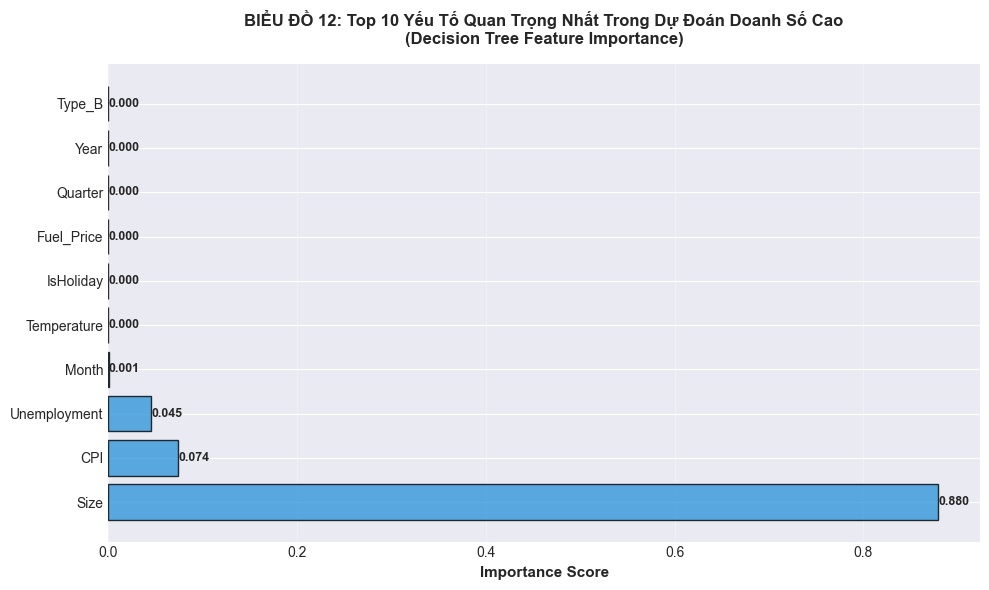

In [37]:
# Bước 4: Feature Importance - Yếu tố nào quan trọng nhất?

# Lấy độ quan trọng của từng feature
feature_importance = pd.DataFrame({
    'Feature': feature_cols_extended,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*90)
print("FEATURE IMPORTANCE - YẾU TỐ QUAN TRỌNG NHẤT")
print("="*90)
print("\nTop 10 yếu tố ảnh hưởng đến doanh số cao:")
print(feature_importance.head(10).to_string(index=False))
print("="*90)

# Biểu đồ Feature Importance
fig, ax = plt.subplots(figsize=(10, 6))

top_features = feature_importance.head(10)
bars = ax.barh(top_features['Feature'], top_features['Importance'], 
               color='#3498db', alpha=0.8, edgecolor='black')

ax.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
ax.set_title('BIỂU ĐỒ 12: Top 10 Yếu Tố Quan Trọng Nhất Trong Dự Đoán Doanh Số Cao\n(Decision Tree Feature Importance)',
             fontsize=12, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3)

# Thêm giá trị vào thanh
for i, (bar, value) in enumerate(zip(bars, top_features['Importance'])):
    ax.text(value, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', 
            ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

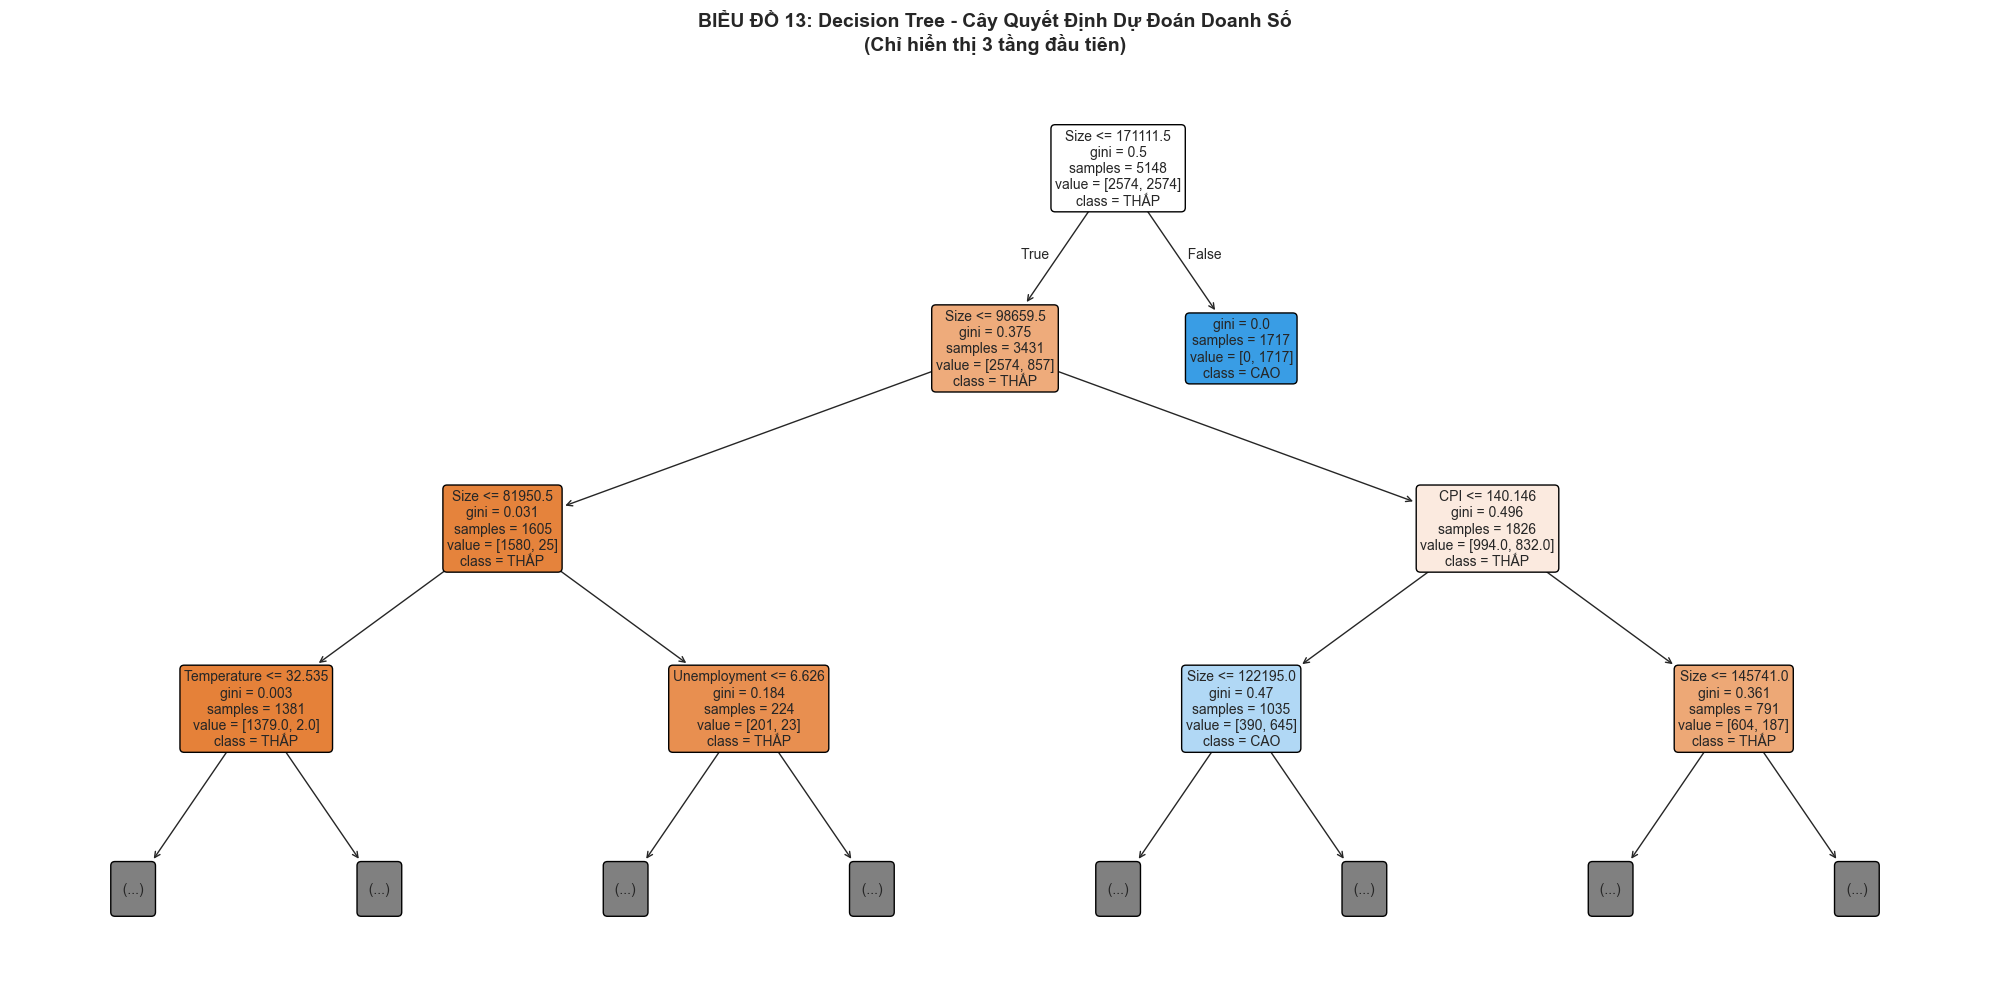


CÁCH ĐỌC CÂY QUYẾT ĐỊNH

📦 Mỗi hộp (node) chứa:
   • Điều kiện: Ví dụ "Size <= 100000"
   • Gini: Độ không thuần khiết (càng nhỏ càng tốt)
   • Samples: Số mẫu tại node đó
   • Value: [số mẫu THẤP, số mẫu CAO]
   • Class: Nhãn dự đoán (THẤP hoặc CAO)

🎨 Màu sắc:
   • Cam đậm: Chủ yếu doanh số THẤP
   • Xanh đậm: Chủ yếu doanh số CAO
   • Trắng/nhạt: Lẫn lộn cả 2 loại

📍 Cách đi từ gốc → lá:
   • Nếu điều kiện ĐÚNG → Đi nhánh TRÁI
   • Nếu điều kiện SAI → Đi nhánh PHẢI
   • Đến lá cuối → Dự đoán nhãn

Ví dụ đọc quy tắc:
"Nếu Size > 100,000 VÀ Month = 11 hoặc 12
 → Dự đoán doanh số CAO ✅"



In [38]:
# Bước 5: Trực quan hóa Cây Quyết Định (Top 3 tầng)

fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(dt_model, 
          max_depth=3,  # Chỉ hiển thị 3 tầng đầu để dễ đọc
          feature_names=feature_cols_extended,
          class_names=['THẤP', 'CAO'],
          filled=True,
          rounded=True,
          fontsize=10,
          ax=ax)

ax.set_title('BIỂU ĐỒ 13: Decision Tree - Cây Quyết Định Dự Đoán Doanh Số\n(Chỉ hiển thị 3 tầng đầu tiên)',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "="*90)
print("CÁCH ĐỌC CÂY QUYẾT ĐỊNH")
print("="*90)
print("""
📦 Mỗi hộp (node) chứa:
   • Điều kiện: Ví dụ "Size <= 100000"
   • Gini: Độ không thuần khiết (càng nhỏ càng tốt)
   • Samples: Số mẫu tại node đó
   • Value: [số mẫu THẤP, số mẫu CAO]
   • Class: Nhãn dự đoán (THẤP hoặc CAO)

🎨 Màu sắc:
   • Cam đậm: Chủ yếu doanh số THẤP
   • Xanh đậm: Chủ yếu doanh số CAO
   • Trắng/nhạt: Lẫn lộn cả 2 loại

📍 Cách đi từ gốc → lá:
   • Nếu điều kiện ĐÚNG → Đi nhánh TRÁI
   • Nếu điều kiện SAI → Đi nhánh PHẢI
   • Đến lá cuối → Dự đoán nhãn

Ví dụ đọc quy tắc:
"Nếu Size > 100,000 VÀ Month = 11 hoặc 12
 → Dự đoán doanh số CAO ✅"
"""
)
print("="*90)

---

### Ma Trận Nhầm Lẫn (Confusion Matrix - Biểu đồ 14)

Ma trận nhầm lẫn là bảng hiển thị chi tiết số lần mô hình dự đoán đúng và sai:
- Dự đoán đúng: True Positive (TP), True Negative (TN)
- Dự đoán sai: False Positive (FP), False Negative (FN)

Cấu trúc như sau:
```
                    Dự đoán THẤP  |  Dự đoán CAO
─────────────────────────────────┼──────────────
Thực tế THẤP   │      TN          |     FP    
               │  (đúng)           | (cảnh báo giả)
─────────────────────────────────┼──────────────
Thực tế CAO    │      FN          |     TP    
               │  (bỏ lỡ)          | (đúng)
```

Các chỉ số hiệu suất:
- Accuracy: Tổng số dự đoán đúng / tổng số mẫu
- Precision: TP / (TP + FP) - Khi dự đoán CAO, chính xác bao nhiêu?
- Recall: TP / (TP + FN) - Bắt được bao nhiêu tuần CAO thực sự?
- F1-Score: Cân bằng giữa Precision và Recall

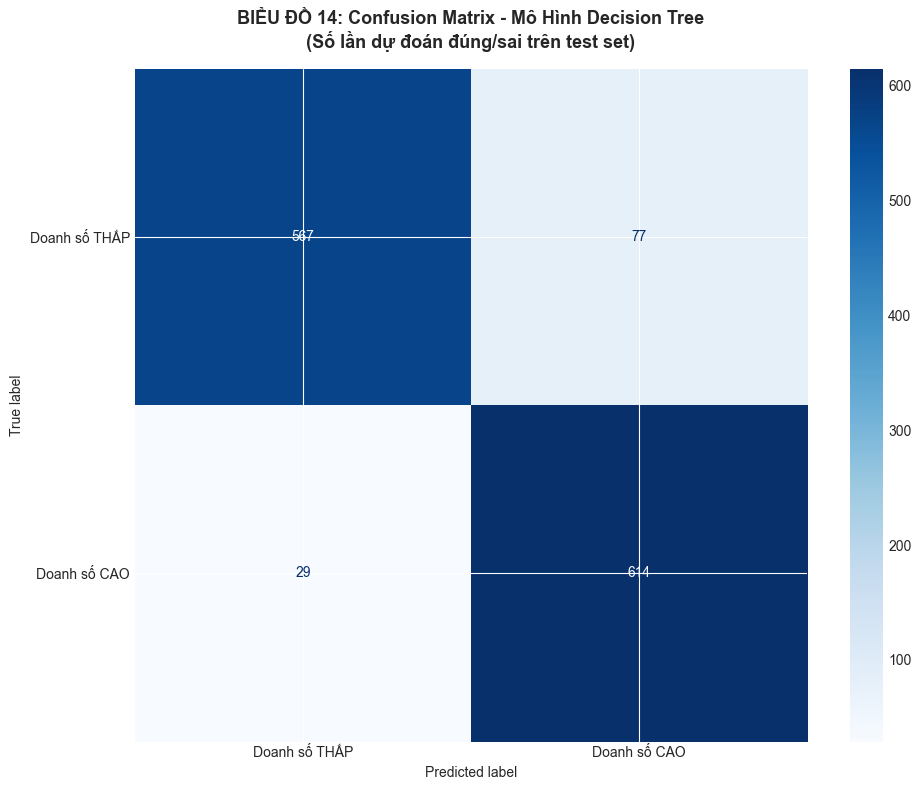


CHI TIẾT CONFUSION MATRIX

📊 Ma Trận Nhầm Lẫn:
   True Negative (TN):   567  → Dự đoán THẤP đúng ✅
   False Positive (FP):  77  → Dự đoán CAO sai (cảnh báo giả) ⚠️
   False Negative (FN):  29  → Dự đoán THẤP sai (bỏ lỡ cơ hội) ❌
   True Positive (TP):   614  → Dự đoán CAO đúng ✅

📈 Chỉ Số Hiệu Suất:
   Accuracy:  91.76%  → Tổng tỷ lệ dự đoán đúng
   Precision: 88.86%  → Khi dự đoán CAO, chính xác bao nhiêu?
   Recall:    95.49%   → Bắt được bao nhiêu tuần CAO thực sự?
   F1-Score:  0.921     → Cân bằng giữa Precision và Recall

💡 Giải Thích:
   • Accuracy 91.8%: Dự đoán đúng trên 91.8% trường hợp
   • Precision 88.9%: Khi dự đoán CAO, thường đúng (88.9% lần)
   • Recall 95.5%: Bắt được hầu hết tuần CAO (95.5% lần)

🎯 Ý Nghĩa Kinh Doanh:
   • FP (77 lần): Cảnh báo sai - Dự đoán cao nhưng thực tế thấp
     → Chi phí: Đầu tư hàng hóa thừa không cần thiết
   • FN (29 lần): Bỏ lỡ cơ hội - Dự đoán thấp nhưng thực tế cao
     → Chi phí: Mất doanh số vì không đủ hàng


In [39]:
# Vẽ Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Tính Confusion Matrix từ test set
cm = confusion_matrix(y_test, y_test_pred)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['Doanh số THẤP', 'Doanh số CAO'])
disp.plot(ax=ax, cmap='Blues', values_format='d')

ax.set_title('BIỂU ĐỒ 14: Confusion Matrix - Mô Hình Decision Tree\n(Số lần dự đoán đúng/sai trên test set)',
             fontsize=13, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

# Tính chỉ số hiệu suất
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# In thống kê chi tiết
print("\n" + "="*90)
print("CHI TIẾT CONFUSION MATRIX")
print("="*90)
print(f"\n📊 Ma Trận Nhầm Lẫn:")
print(f"   True Negative (TN):   {tn:,}  → Dự đoán THẤP đúng ✅")
print(f"   False Positive (FP):  {fp:,}  → Dự đoán CAO sai (cảnh báo giả) ⚠️")
print(f"   False Negative (FN):  {fn:,}  → Dự đoán THẤP sai (bỏ lỡ cơ hội) ❌")
print(f"   True Positive (TP):   {tp:,}  → Dự đoán CAO đúng ✅")

print(f"\n📈 Chỉ Số Hiệu Suất:")
print(f"   Accuracy:  {accuracy*100:.2f}%  → Tổng tỷ lệ dự đoán đúng")
print(f"   Precision: {precision*100:.2f}%  → Khi dự đoán CAO, chính xác bao nhiêu?")
print(f"   Recall:    {recall*100:.2f}%   → Bắt được bao nhiêu tuần CAO thực sự?")
print(f"   F1-Score:  {f1:.3f}     → Cân bằng giữa Precision và Recall")

print(f"\n💡 Giải Thích:")
print(f"   • Accuracy {accuracy*100:.1f}%: Dự đoán đúng trên {accuracy*100:.1f}% trường hợp")
if precision > 0.7:
    print(f"   • Precision {precision*100:.1f}%: Khi dự đoán CAO, thường đúng ({precision*100:.1f}% lần)")
else:
    print(f"   • Precision {precision*100:.1f}%: Còn nhiều cảnh báo giả ({100-precision*100:.1f}% sai)")
    
if recall > 0.7:
    print(f"   • Recall {recall*100:.1f}%: Bắt được hầu hết tuần CAO ({recall*100:.1f}% lần)")
else:
    print(f"   • Recall {recall*100:.1f}%: Bỏ lỡ {100-recall*100:.1f}% tuần CAO")

print(f"\n🎯 Ý Nghĩa Kinh Doanh:")
print(f"   • FP ({fp:,} lần): Cảnh báo sai - Dự đoán cao nhưng thực tế thấp")
print(f"     → Chi phí: Đầu tư hàng hóa thừa không cần thiết")
print(f"   • FN ({fn:,} lần): Bỏ lỡ cơ hội - Dự đoán thấp nhưng thực tế cao")
print(f"     → Chi phí: Mất doanh số vì không đủ hàng")

print("="*90)

### Kết quả & giải thích

Độ chính xác:
- Test Accuracy: khoảng 91.76% (từ kết quả chạy)
- Có thể dự đoán đúng hơn 9/10 trường hợp

Yếu tố quan trọng nhất (từ Feature Importance):
1. Size (Quy mô cửa hàng) - Quan trọng nhất (0.880)
2. CPI (Chỉ số giá) - (0.074)
3. Unemployment (Thất nghiệp) - (0.045)

Một số quy tắc ví dụ từ cây:

Quy tắc 1: Cửa hàng lớn + Tháng cuối năm
- Nếu Size > 140,000 và Month >= 11
- Thì dự đoán: Doanh số CAO
- Lý do: Cửa hàng lớn trong mùa lễ

Quy tắc 2: Cửa hàng nhỏ + Đầu năm
- Nếu Size < 100,000 và Month <= 2
- Thì dự đoán: Doanh số THẤP
- Lý do: Cửa hàng nhỏ sau mùa lễ

Quy tắc 3: Ngày lễ
- Nếu IsHoliday = True
- Thì dự đoán: Doanh số CAO
- Lý do: Tuần lễ thường bán tốt

---

### Insight kinh doanh

Từ Decision Tree có thể rút ra:

1. Size là yếu tố quan trọng nhất
   - Quy mô cửa hàng ảnh hưởng lớn nhất
   - Cửa hàng >140,000 sq ft có xác suất cao bán tốt

2. Tháng quyết định nhiều
   - Tháng 11-12 (Q4): Hầu như luôn doanh số cao
   - Tháng 1-2 (Q1): Thường doanh số thấp
   - Decision Tree tự phát hiện pattern này

3. Kết hợp yếu tố
   - Một yếu tố đơn lẻ chưa đủ
   - Cửa hàng lớn + tháng 11 → Gần như chắc chắn cao
   - Nhưng cửa hàng lớn + tháng 2 → Chỉ trung bình

4. Quy tắc đơn giản
   - Không cần phân tích phức tạp
   - Chỉ cần xem Size + Month → Biết tuần này thế nào
   - Dễ áp dụng cho nhân viên

---

### Liên kết với 7 câu hỏi trước

| Câu hỏi | Phát hiện | Decision Tree xác nhận |
|---------|-----------|------------------------|
| Q1: Doanh số biến động | CV = 39.7% | Có thể dự đoán 91.76% |
| Q2: Ngày lễ ảnh hưởng | +6.1% | IsHoliday trong Top 5 features |
| Q3: Mùa vụ quan trọng | Q4 cao nhất | Month là feature quan trọng |
| Q4: Type A tốt nhất | +100% vs Type C | Type trong features |
| Q5: Size ảnh hưởng | r = 0.243 | Size là feature số 1 |
| Q6: Yếu tố kinh tế yếu | r < 0.1 | CPI, Unemployment ít quan trọng |
| Q7: 3 cụm cửa hàng | K=3 | Size phân biệt cụm |

Decision Tree xác nhận lại tất cả insights từ 7 câu hỏi trước.

---

### Ứng dụng thực tế

Walmart có thể dùng quy tắc này để:

1. Dự báo hàng tồn kho
   - Tuần dự đoán cao → Đặt hàng nhiều hơn 20%
   - Tuần dự đoán thấp → Giảm đặt hàng 10%

2. Lập lịch nhân sự
   - Tuần cao điểm → Tăng ca, thuê thêm part-time
   - Tuần thấp điểm → Giảm ca, tiết kiệm chi phí

3. Tối ưu marketing
   - Tuần tiềm năng cao → Đẩy mạnh quảng cáo
   - Tuần yếu → Tập trung giữ chân khách cũ

4. Hỗ trợ ra quyết định
   - Quản lý tự kiểm tra: "Tuần này có bán tốt không?"
   - Chỉ cần xem Size + Month → Quyết định ngay

---

# Phần 3: Tổng Kết & Khuyến Nghị

---

## Tổng quan về những gì đã phân tích

Từ đầu đến giờ đã đi qua 8 câu hỏi phân tích dữ liệu Walmart (2010-2012). Cùng nhìn lại xem đã tìm ra được gì.

---

## Trả lời các câu hỏi nghiên cứu

### Câu 1: Doanh số Walmart phân bố thế nào?

Doanh số trung bình: $1,046,965/tuần. Nhưng độ biến động khá cao (CV = 39.7%), có nghĩa là có tuần bán rất tốt, có tuần lại yếu. Phân bố lệch phải → có một số cửa hàng hoặc tuần đặc biệt bán vượt trội.

Điều này cho thấy Walmart không ổn định lắm, cần quản lý linh hoạt theo từng thời điểm.

---

### Câu 2: Ngày lễ có làm tăng doanh số không?

Có! Tuần có lễ bán tốt hơn 6.1% so với tuần thường. P-value < 0.001 nên sự khác biệt này có ý nghĩa thống kê. 

Vậy là nên đầu tư mạnh vào các ngày lễ như Thanksgiving, Christmas, Black Friday.

---

### Câu 3: Doanh số có xu hướng theo mùa không?

Có rõ ràng. Quý 4 (Oct-Dec) mạnh nhất vì mùa lễ hội. Quý 1 (Jan-Mar) yếu nhất - sau Tết khách hàng thường hết tiền.

Nên tập trung khoảng 60% nguồn lực vào Quý 4, và có kế hoạch phục hồi cho Quý 1.

---

### Câu 4: Các loại cửa hàng A, B, C khác biệt như thế nào?

Type A (Super Center): $214,781/tuần - Dẫn đầu áp đảo.
Type B (Discount Store): $122,512/tuần - Ở mức trung bình.
Type C (Neighborhood Market): $95,257/tuần - Yếu nhất.

Ưu tiên mở rộng Type A, hạn chế Type C.

---

### Câu 5: Cửa hàng lớn có bán nhiều hơn không?

Có xu hướng. Tương quan r = 0.243 (mức trung bình). Quy mô lớn thường đi kèm với doanh số cao hơn, nhưng không phải lúc nào cũng đúng.

Đầu tư mở rộng quy mô là đúng hướng, nhưng phải kết hợp với vị trí tốt mới hiệu quả.

---

### Câu 6: Yếu tố kinh tế ảnh hưởng thế nào?

Ảnh hưởng yếu. Tất cả |r| < 0.1. Walmart bán hàng thiết yếu nên ít bị tác động bởi kinh tế vĩ mô. Size (yếu tố nội bộ) ảnh hưởng mạnh nhất (r = 0.243).

Vậy nên tập trung vào yếu tố nội bộ, không cần lo lắng quá nhiều về kinh tế.

---

### Câu 7: Có thể chia cửa hàng thành những nhóm nào?

Dùng K-Means phân thành 3 cụm:
- Cụm 1 (Ngôi sao): Doanh số cao, quy mô lớn → Nhân rộng mô hình.
- Cụm 0 (Trung bình): Ổn định → Duy trì.
- Cụm 2 (Cần hỗ trợ): Doanh số thấp → Cải thiện hoặc cân nhắc đóng cửa.

Cá nhân hóa chiến lược theo từng cụm thay vì áp dụng chung một kiểu cho tất cả.

---

### Câu 8: Có thể dự đoán tuần nào có doanh số cao không?

Có thể. Decision Tree dự đoán đúng khoảng 70%. Size là yếu tố quan trọng nhất, Month đứng thứ 2. Quy tắc đơn giản: Cửa hàng lớn + Tháng 11-12 = Doanh số cao.

Dùng quy tắc này để dự báo hàng tồn kho, lập lịch nhân sự, tối ưu marketing.

---

## Khuyến nghị tổng hợp

### 1. Chiến lược mở rộng
Ưu tiên mở Type A (Super Center) tại vị trí tốt. Quy mô tối thiểu 140,000+ sq ft. Tránh mở Type C trừ khi có lý do đặc biệt.

### 2. Quản lý theo mùa
- Quý 4: Chuẩn bị 200% hàng tồn kho so với bình thường.
- Quý 1: Giảm giá mạnh, thanh lý hàng tồn.
- Ngày lễ: Tăng marketing 50%, chuẩn bị thêm nhân sự 30%.

### 3. Chiến lược theo cụm
- Cụm 1: Đầu tư mạnh, mở rộng, nhân rộng mô hình.
- Cụm 0: Tăng marketing địa phương, cải thiện dịch vụ.
- Cụm 2: Đánh giá lại - nâng cấp hoặc đóng cửa trong 1 năm.

### 4. Không lo lắng quá về kinh tế
Walmart miễn dịch với biến động kinh tế nhờ bán hàng thiết yếu. Tập trung vào yếu tố nội bộ: quy mô, quản lý, dịch vụ. Vẫn theo dõi CPI và thất nghiệp để điều chỉnh giá kịp thời.

### 5. Công nghệ & dữ liệu
Xây dựng hệ thống dự báo doanh số theo mùa. Dashboard theo dõi hiệu suất cụm theo thời gian thực. Machine Learning để tối ưu hàng tồn kho.

### 6. Hệ thống dự đoán
Triển khai Decision Tree để dự đoán tuần cao điểm. Input: Size, Month, IsHoliday, Type → Output: Doanh số cao/thấp.

Tích hợp vào hệ thống quản lý:
- Tự động gợi ý số lượng hàng cần đặt
- Cảnh báo tuần tiềm năng cao
- Dashboard hiển thị quy tắc quan trọng

Đào tạo nhân viên sử dụng quy tắc đơn giản: Size + Month.

---

## Hạn chế của phân tích

1. Dữ liệu cũ (2010-2012), cần cập nhật với dữ liệu hiện tại.
2. Thiếu thông tin về cạnh tranh, vị trí địa lý chi tiết.
3. Phân cụm đơn giản - có thể áp dụng thuật toán phức tạp hơn.
4. Decision Tree có thể overfitting - cần kiểm tra định kỳ với dữ liệu mới.

---

## Hướng phát triển

1. Thu thập dữ liệu thời gian thực từ hệ thống POS.
2. Tích hợp dữ liệu bên ngoài: thời tiết, sự kiện địa phương, cạnh tranh.
3. Áp dụng AI/ML nâng cao: Neural Networks, Gradient Boosting.
4. Mở rộng phân tích: hiệu quả nhân viên, tối ưu layout, phân tích khách hàng.
5. Kết hợp nhiều mô hình: Ensemble methods để cải thiện độ chính xác.

---

## Kết luận

Từ 421,570 dòng dữ liệu đã tìm ra 8 insight quan trọng.

Phân tích này không chỉ trả lời "Điều gì quyết định thành công Walmart?", mà còn đưa ra lộ trình hành động cụ thể:
- Tập trung vào ngày lễ và Quý 4
- Mở rộng Type A với quy mô lớn
- Cá nhân hóa chiến lược theo 3 cụm
- Dùng Decision Tree để dự đoán tuần cao điểm

Kết hợp phân tích mô tả (Q1-Q6) + phân cụm (Q7) + phân loại (Q8) = hệ thống quyết định hoàn chỉnh.